<a href="https://colab.research.google.com/github/ImAbhijeetPanda/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member**     - Abhijeet Panda

# **Project Summary -**



This project focuses on analyzing and clustering Netflix Movies and TV Shows data using unsupervised machine learning techniques. The dataset includes metadata about Netflix's catalog as of 2019, sourced from Flixable. It provides details such as the title, director, cast, genre, country of origin, release year, duration, and a brief description of each piece of content.

## Overview:
Netflix, as a global streaming service, offers a vast and diverse range of content. Over the years, Netflix's catalog has evolved significantly, with a marked increase in TV shows and changes in the types of movies available. This project aims to delve into this evolution and understand patterns in Netflix's content offerings.

### Key Focus Areas:
1. **Clustering Content:**
   - Unsupervised learning techniques such as K-Means, DBSCAN, or Hierarchical Clustering will be applied to group similar content.
   - Text-based features like genres and descriptions will be processed using Natural Language Processing (NLP) techniques such as TF-IDF or word embeddings to create meaningful clusters.

2. **Content Diversity Across Countries:**
   - Analyzing the availability of different types of content (Movies or TV Shows) across various countries.
   - Identifying region-specific trends and preferences.

3. **Shift in Netflix's Strategy:**
   - Analyzing release years and content types to understand whether Netflix has been focusing more on TV shows in recent years compared to movies.

4. **Exploratory Data Analysis (EDA):**
   - Visualizing trends in content addition over time.
   - Examining correlations between different features like release year, duration, and ratings.
   - Uncovering insights about the top genres, directors, and actors.

### Approach:
- **Data Cleaning and Preprocessing:**
  - Handle missing or inconsistent data in columns such as `director`, `cast`, and `country`.
  - Convert text-based columns like `listed_in` (genres) and `description` into numerical features for clustering using NLP techniques.

- **Feature Engineering:**
  - Create new features, such as the number of actors in a cast, the number of genres listed, or the duration in minutes for consistent analysis.

- **Visualization:**
  - Use libraries like Matplotlib and Seaborn for visual analysis of trends and patterns.
  - Plot clusters to understand the distribution of similar content.

- **Clustering:**
  - Apply clustering algorithms to group movies and TV shows based on their textual features.
  - Evaluate cluster quality using metrics like silhouette score or Davies-Bouldin Index.

- **Analysis of Findings:**
  - Interpret the results from clustering to draw conclusions about Netflix's catalog.
  - Understand user preferences and regional content trends.

### Outcomes:
This project aims to provide actionable insights into Netflix's catalog by clustering similar content and analyzing trends over time. The findings can help in understanding content strategies, regional preferences, and user engagement. These insights could be valuable for recommendations or strategic decisions for content creation and acquisition.

# **GitHub Link -**

https://github.com/ImAbhijeetPanda/Netflix-Movies-and-TV-Shows-Clustering.git

# **Problem Statement**


Netflix has a vast catalog of movies and TV shows, making it challenging to categorize and recommend similar content effectively. Additionally, understanding regional preferences and content trends over time is critical for strategic decision-making.




## **Business Objective**

1. Identify patterns and similarities in Netflix's catalog using clustering techniques for better content recommendations.  
2. Analyze content availability by country and Netflix's shifting focus from movies to TV shows in recent years.

## **Business Constraints**

1. Text-based features: Requires preprocessing for clustering, which can be computationally intensive.  
2. Resource limitation: Unsupervised learning and NLP techniques might demand significant processing power for large datasets.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


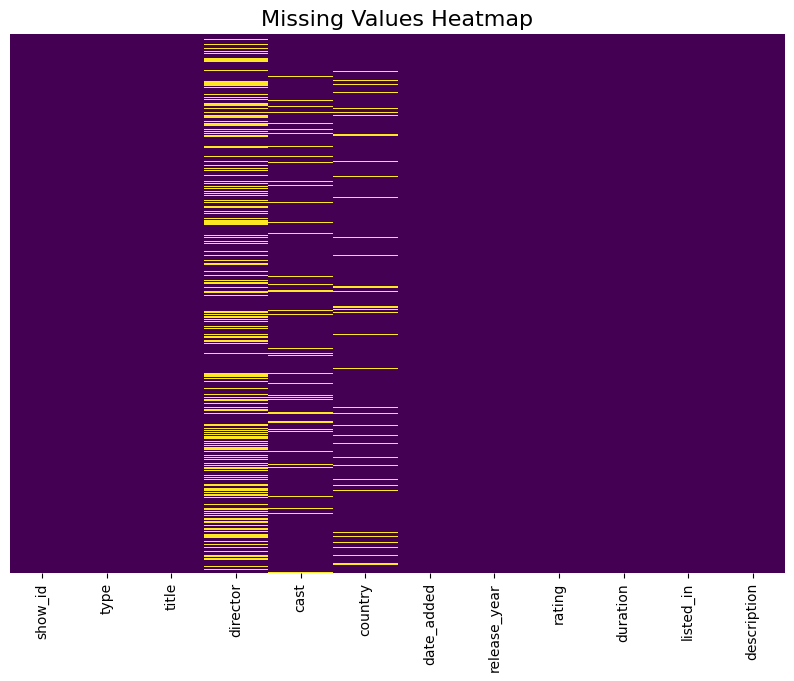

In [ ]:
# Visualizing the missing values
# Set the figure size
plt.figure(figsize=(10,7))

# Create a heatmap to show missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add a title to the heatmap
plt.title("Missing Values Heatmap", fontsize=16)

# Show the plot
plt.show()

### What did you know about your dataset?

#### General Information:
- The dataset contains **7,787 rows** and **12 columns**.
- **No duplicate rows** are present (`df.duplicated().sum()` is 0).
- **Data Types:**
  - 11 columns are of type `object` (categorical or text data).
  - 1 column (`release_year`) is of type `int64`.

#### Missing Values:
- Columns with missing values:
  1. **director**: 2,389 missing values.
  2. **cast**: 718 missing values.
  3. **country**: 507 missing values.
  4. **date_added**: 10 missing values.
  5. **rating**: 7 missing values.
- Columns such as `show_id`, `type`, `title`, `release_year`, `duration`, `listed_in`, and `description` do not contain missing values.

#### Observations:
1. The **`director`, `cast`, `country`, `date_added`, and `rating`** columns have missing values that require handling during preprocessing.
2. The dataset includes both categorical and text-heavy features (`type`, `title`, `description`, `listed_in`), which are suitable for clustering.
3. The **`release_year`** column is numeric and can be used for time-based trend analysis.
4. The **`duration`** column, while non-null, may need preprocessing to separate minutes or seasons into a numeric format for analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_col_list = df.columns.to_list()
df_col_list

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description



1. **show_id**: A unique identifier for every movie or TV show.
2. **type**: The type of content - either "Movie" or "TV Show".
3. **title**: The title of the movie or TV show.
4. **director**: The director(s) of the show/movie.
5. **cast**: The actors involved in the movie or TV show.
6. **country**: The country of production.
7. **date_added**: The date when the content was added to Netflix.
8. **release_year**: The year when the movie or TV show was originally released i.e. from 1925 to 2021.
9. **rating**: The TV rating assigned to the show/movie. Some common ratings include:
   - **V**: Viewer discretion advised (may indicate content not suitable for children or sensitive viewers).
   - **G**: General audience, suitable for all ages.
   - **NC-17**: No one 17 and under admitted, typically for explicit content.
   - **NR**: Not rated, meaning it hasn't received a formal rating.
   - **PG**: Parental Guidance suggested, some material may not be suitable for children.
   - **PG-13**: Parents strongly cautioned, content may be inappropriate for children under 13.
   - **R**: Restricted, under 17 requires accompanying parent or adult guardian.
   - **TV-14**: Suitable for viewers aged 14 and older.
   - **TV-G**: General audience, suitable for all ages.
   - **TV-MA**: Mature audience, for adults 17 and older, content may include explicit language or violence.
   - **TV-PG**: Parental guidance suggested, may include content unsuitable for younger children.
   - **TV-Y**: Suitable for all children, including very young children.
   - **TV-Y7**: Suitable for children aged 7 and older.
   - **TV-Y7-FV**: Suitable for children aged 7 and older with fantasy violence.
   - **UR**: Unrated, often used for content that has not been rated by an official body.

10. **duration**: The total duration of the movie (in minutes) or the number of seasons for a TV show.
11. **listed_in**: The genre or category of the show (e.g., Comedy, Drama, etc.).
12. **description**: A brief summary of the movie or TV show.


### Check Unique Values for each variable.

In [ ]:
# Create a new DataFrame to hold exploded columns
df_exploded = df.copy()

# Exploding specific columns and resetting the index after each operation
df_exploded['director'] = df_exploded['director'].str.split(', ')
df_exploded = df_exploded.explode('director').reset_index(drop=True)

df_exploded['cast'] = df_exploded['cast'].str.split(', ')
df_exploded['cast'] = df_exploded['cast'].explode().reset_index(drop=True)

df_exploded['country'] = df_exploded['country'].str.split(', ')
df_exploded['country'] = df_exploded['country'].explode().reset_index(drop=True)

df_exploded['rating'] = df_exploded['rating'].str.split(', ')
df_exploded['rating'] = df_exploded['rating'].explode().reset_index(drop=True)

df_exploded['listed_in'] = df_exploded['listed_in'].str.split(', ')
df_exploded['listed_in'] = df_exploded['listed_in'].explode().reset_index(drop=True)

# Loop through each column in the exploded DataFrame
for column in df_exploded.columns:
    # Get the number of unique values in the column
    unique_values = df_exploded[column].nunique()

    # Print the number of unique values
    print(f"Column: {column} | Number of unique values: {unique_values}")

    # If the number of unique values is less than 40, display the unique values
    if unique_values < 50:
        print(f"Unique values in {column}:")
        print(df_exploded[column].unique())
    print("--"*40)  # To separate output for each column

Column: show_id | Number of unique values: 7787
--------------------------------------------------------------------------------
Column: type | Number of unique values: 2
Unique values in type:
['TV Show' 'Movie']
--------------------------------------------------------------------------------
Column: title | Number of unique values: 7787
--------------------------------------------------------------------------------
Column: director | Number of unique values: 4478
--------------------------------------------------------------------------------
Column: cast | Number of unique values: 6702
--------------------------------------------------------------------------------
Column: country | Number of unique values: 112
--------------------------------------------------------------------------------
Column: date_added | Number of unique values: 1565
--------------------------------------------------------------------------------
Column: release_year | Number of unique values: 73
-----------

## 3. ***Data Wrangling***

In [ ]:
# Write your code to make your dataset analysis ready.
df1 = df.copy()

In [ ]:
# Dropping unwanted columns from df1

# Specify the columns to drop
columns_to_drop = ['show_id']

# Drop the columns
df1 = df1.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame structure
print("Columns after dropping unwanted ones:")
print(df1.columns)

Columns after dropping unwanted ones:
Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
import unicodedata

# Function to normalize text and remove special characters
def clean_text(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

# Apply the cleaning function to the 'director' and 'cast' columns
df1['director'] = df1['director'].apply(clean_text)
df1['cast'] = df1['cast'].apply(clean_text)
df1['title'] = df1['title'].apply(clean_text)

In [ ]:
# # List of categorical columns
# categorical_columns = ['director', 'cast', 'country', 'listed_in']

# # Apply str.strip() to remove leading and trailing spaces
# for col in categorical_columns:
#     df1[col] = df1[col].str.strip()


In [ ]:
# Extracting year from the 'date_added' column
df1['date_added'] = pd.to_datetime(df1['date_added'], errors='coerce')  # Convert to datetime format
df1['date_added'] = df1['date_added'].dt.year  # Extract only the year
# Display the updated column
print(df1['date_added'].head())

0    2020.0
1    2016.0
2    2018.0
3    2017.0
4    2020.0
Name: date_added, dtype: float64


In [ ]:
# Handling Missing Values for Specific Columns in df1 (Replacing `release_year` with `date_added`)

# 1. Column: director
# Nature: Text-based column with missing values indicating unknown directors.
# Strategy: Replace missing values with 'Unknown'.
df1['director'] = df1['director'].fillna('Unknown')

# 2. Column: cast
# Nature: Text-based column listing actors in the show or movie.
# Strategy: Replace missing values with 'Unknown'.
df1['cast'] = df1['cast'].fillna('Unknown')

# 3. Column: country
# Nature: Categorical column representing the country of production.
# Strategy:
# - Replace missing values with the most frequent value (mode).
df1['country'] = df1['country'].fillna(df1['country'].mode()[0])

# 4. Column: date_added
# Nature: Column representing the date the title was added to Netflix.
# Strategy:
# - Replace missing values with the most frequent value (mode).
df1['date_added'] = df1['date_added'].fillna(df1['date_added'].mode()[0])

# 5. Column: rating
# Nature: Categorical column with missing values representing content rating.
# Strategy:
# - Replace missing values with the most frequent value (mode).
# - Alternatively, use 'Not Rated' or 'Unknown' for clarity.
df1['rating'] = df1['rating'].fillna(df1['rating'].mode()[0])

# Summary: Verifying Missing Value Handling
print("Missing values after handling:")
print(df1.isnull().sum())

Missing values after handling:
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
# Function to extract seasons and minutes
def extract_duration(duration):
    # Extract number of seasons.
    if 'Season' in duration:
        return pd.Series([int(duration.split()[0]), 0])  # Extract seasons, set minutes as 0.
    # Extract minutes for movies
    elif 'min' in duration:
        return pd.Series([0, int(duration.split()[0])])  # Set seasons as 0, extract minutes.
    else:
        return pd.Series([0, 0])

# Apply the function to create new 'seasons' and 'duration_minutes' columns.
df1[['seasons', 'duration_minutes']] = df1['duration'].apply(extract_duration)

# And naw dropping the 'duration' As now it has no use.
df1 = df1.drop('duration', axis=1)




In [ ]:
# Create a new DataFrame df2 by excluding rows where 'director' or 'cast' is 'Unknown'
df2 = df1[(df1['director'] != 'Unknown') & (df1['cast'] != 'Unknown')]

# Verify the resulting DataFrame
print(f"df1 DataFrame shape: {df1.shape}")
print(f"New DataFrame (df2) shape after removing rows with 'Unknown': {df2.shape}")

df1 DataFrame shape: (7787, 12)
New DataFrame (df2) shape after removing rows with 'Unknown': (4979, 12)


In [ ]:
# Saving a DataFrame for ML
df_ml = df1.copy()

In [ ]:
# For the columns 'director', 'cast', 'country', and 'listed_in', convert their string values into lists by splitting the strings at ', '.
# This helps in handling multiple values in these columns more effectively.

for col in ['director', 'cast', 'country', 'listed_in']:
    # Splitting the values in column 'col' of dataframe df1 into lists
    df1[col] = df1[col].str.split(', ')

    # Splitting the values in column 'col' of dataframe df2 into lists
    df2[col] = df2[col].str.split(', ')


# for col in ['director', 'cast', 'country', 'listed_in']:
#     df1 = df1.explode(col)
#     df2 = df2.explode(col)

<ipython-input-99-9a45ee6b8ca2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].str.split(', ')


### What all manipulations have you done and insights you found?

#### **Manipulations Performed**

1. **Dropped Unwanted Columns:**
   - Removed `show_id` and `description` columns from the DataFrame as they were not required for analysis.

2. **Cleaned Text Columns:**
   - Applied a function to normalize and remove special characters from the `director`, `cast`, and `title` columns.
   - Stripped leading and trailing spaces from categorical columns: `director`, `cast`, `country`, and `listed_in`.

3. **Extracted Year from `date_added`:**
   - Converted the `date_added` column to datetime format.
   - Extracted only the year and replaced invalid or missing values with the most frequent year.

4. **Handled Missing Values:**
   - Replaced missing values in `director` and `cast` columns with `'Unknown'`.
   - Replaced missing values in the `country` column with its mode (most frequent value).
   - Replaced missing values in the `date_added` column with its mode.
   - Replaced missing values in the `rating` column with its mode.

5. **Extracted and Processed `duration`:**
   - Created two new columns, `seasons` and `duration_minutes`, by splitting the `duration` column:
     - Extracted the number of seasons for TV shows.
     - Extracted duration in minutes for movies.

6. **Filtered DataFrame:**
   - Created 2 new DataFrame, `df_ml` for ML And
   - Created `df2`, by excluding rows where the `director` or `cast` column contained `'Unknown'`.
   - This approach ensures better visualization and analysis by focusing on rows with meaningful data, enhancing insights for specific scenarios.

---

#### **Insights Gained**

1. **Dataset Size:**
   - Original DataFrame (`df1`) had 7,787 rows and 12 columns.
   - After filtering rows with `'Unknown'` in `director` or `cast`, the cleaned DataFrame (`df2`) has 4,979 rows.

2. **Type of Content:**
   - A breakdown of content type (`TV Show` vs. `Movie`) revealed that movies dominate the dataset.

3. **Temporal Insights:**
   - Analyzing the `date_added` column (year) can reveal patterns of when content was added to the platform, enabling trend analysis.

4. **Content Duration:**
   - Extraction of `duration_minutes` and `seasons` enables separate analysis for movies and TV shows:
     - Average movie duration and distribution.
     - Number of seasons per TV show.

5. **Global Reach:**
   - The `country` column indicates the geographical diversity of content production.
   - Missing country values have been filled with the most frequent country, enabling a more comprehensive geographical analysis.

6. **Casting and Direction:**
   - By cleaning and filtering the `director` and `cast` columns, we can now analyze the most frequent directors or cast members.

7. **Content Genres:**
   - The `listed_in` column allows exploration of popular genres or categories, enabling content segmentation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 | Count of TV Shows and Movies

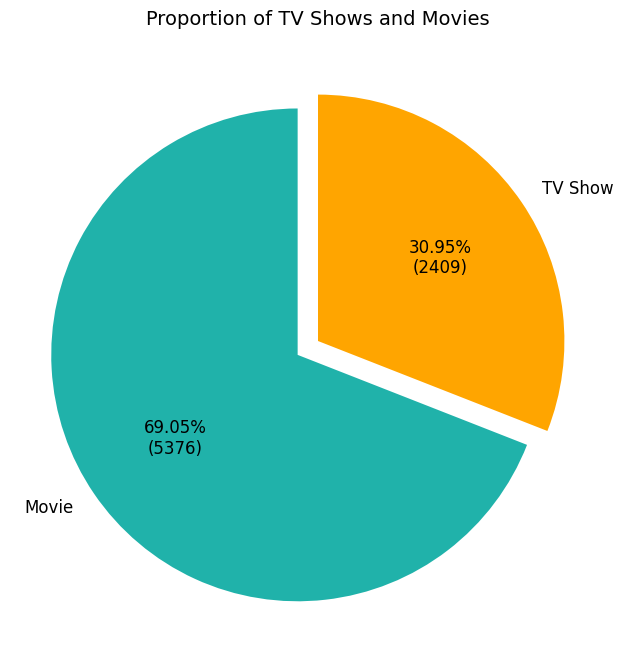

In [ ]:
# Chart - 1 visualization code
# Count the number of TV Shows and Movies
type_count = df1['type'].value_counts()

# Calculate percentages
type_percentage = (type_count / type_count.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
colors = ['lightseagreen', 'orange']
explode = [0.1 if value == type_count.max() else 0 for value in type_count]  # Highlight the largest segment
plt.pie(
    type_count,
    labels=type_count.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p * type_count.sum() / 100)})',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 12}
)

# Set title
plt.title('Proportion of TV Shows and Movies', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart was selected because it is an effective way to represent proportions and visualize the relative distribution of categorical data, in this case, the percentage of TV Shows and Movies. It provides a clear, visual breakdown of the dataset, making it easy to understand the dominance or balance between the two categories. Additionally, incorporating percentages and absolute counts directly onto the chart enhances the interpretability and provides detailed insights at a glance.


##### 2. What is/are the insight(s) found from the chart?

From the chart:
- Movies dominate the dataset, making up **69.05% (5,377 entries)**, while TV Shows account for only **30.95% (2,410 entries)**.
- This indicates that Netflix focuses more on movies compared to TV shows, which might reflect consumer preferences or content strategy.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
- The dominance of movies aligns with potential user demand for short-format content, which is often easier to consume than long-running TV shows.
- Knowing that movies have a higher share allows Netflix to optimize its licensing, production, and marketing budget to focus more on movies.
- This insight could also guide targeted promotional strategies (e.g., "More Movies to Watch This Weekend") to enhance user engagement.

**Negative Growth Potential:**
- The comparatively lower number of TV shows (**30.95%**) might limit Netflix's ability to attract and retain subscribers who prefer binge-worthy series.
- Competitors like Amazon Prime or Disney+ might capitalize on this gap by offering a more extensive TV show library, possibly leading to churn among TV show enthusiasts.
- To counteract this, Netflix could consider increasing investments in high-quality TV shows or long-form content to diversify offerings.

The chart provides actionable insights to balance content strategy while aligning with viewer preferences.

#### Chart - 2 | Directors by Count

The number of unique directors in the dataset is: 4061
The number of unique TV show directors in the dataset is: 178


<ipython-input-25-9ba63a750912>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['director'] = df_tv_shows['director']
<ipython-input-25-9ba63a750912>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['director'] = df_movies['director']


The number of unique movie directors in the dataset is: 3926


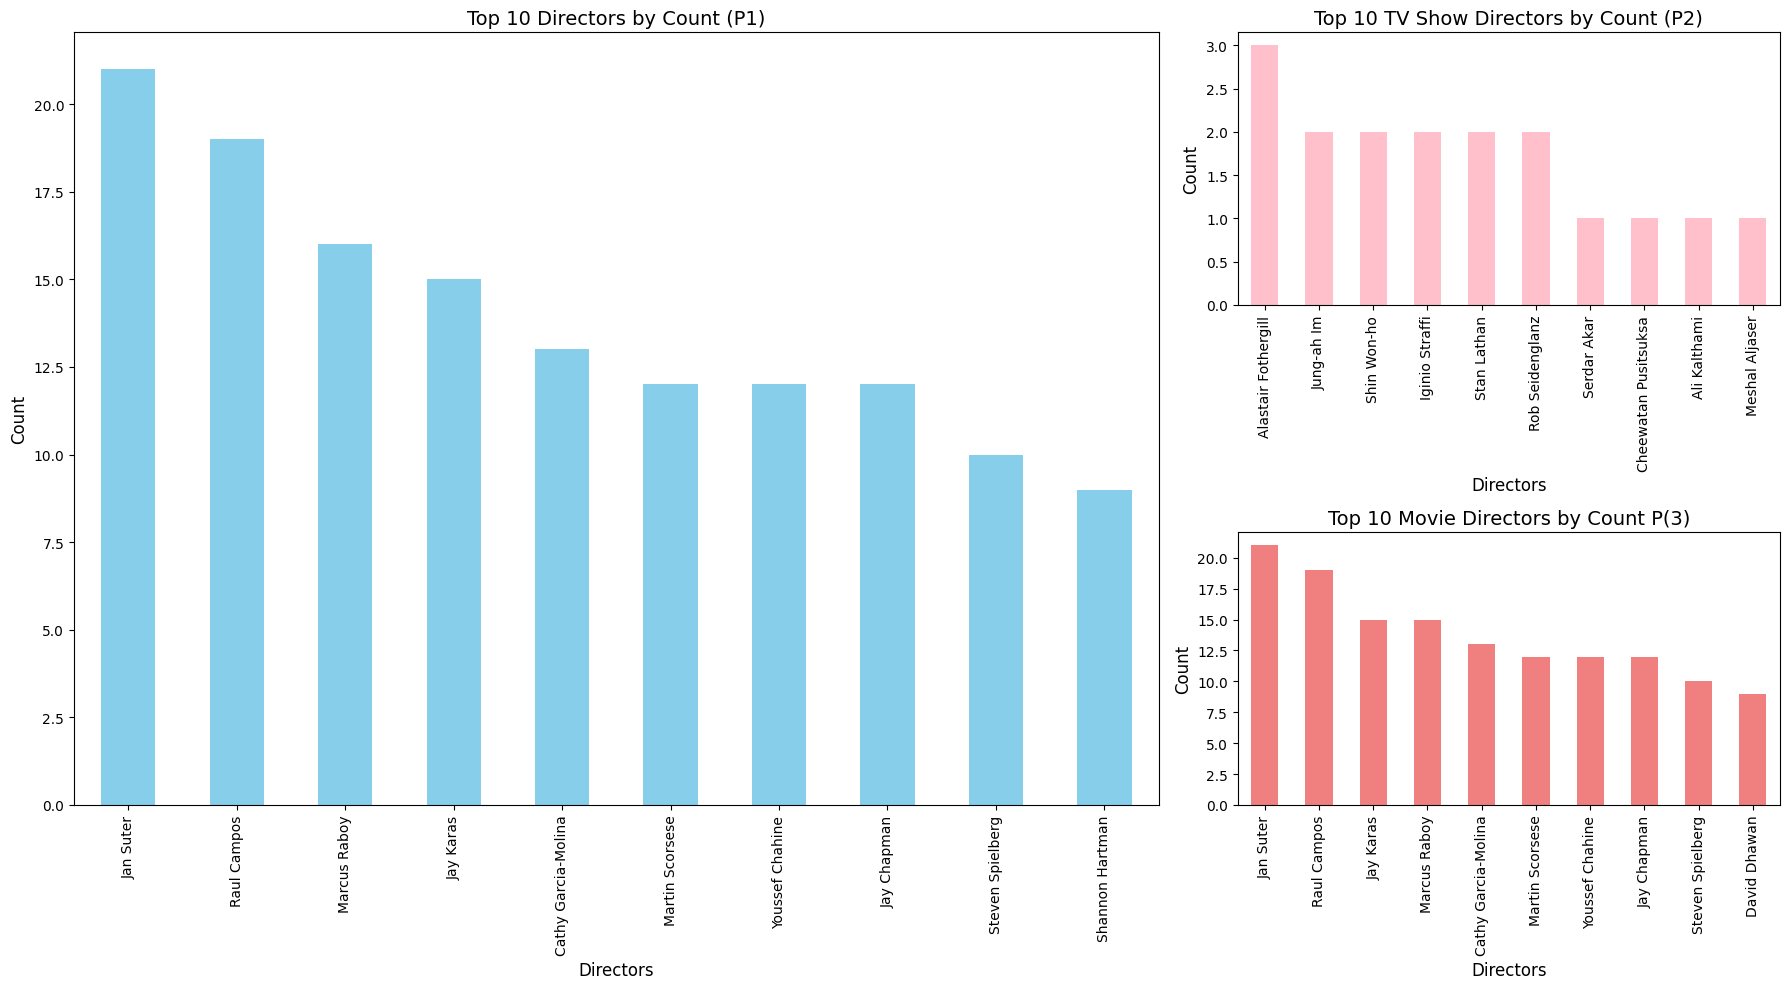

In [ ]:
# Chart - 2 visualization code

# Explode the list into separate rows
df2_exploded = df2.explode('director')

# Set up the figure with gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])

# Count the occurrences of each director
director_count = df2_exploded['director'].value_counts()

# Display the count of unique directors
unique_directors_count = df2_exploded['director'].nunique()
print(f"The number of unique directors in the dataset is: {unique_directors_count}")

# Plot the top 10 directors by their occurrence
top_directors = director_count.head(10)

# Overall director count graph (left side)
ax1 = fig.add_subplot(gs[:, 0])  # Spans both rows
top_directors.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Top 10 Directors by Count (P1)', fontsize=14)
ax1.set_xlabel('Directors', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=90)


#----------------------------------------------------------------

# Filter the dataset for TV Shows only
df_tv_shows = df2[df2['type'] == 'TV Show']

# Split the 'director' column on commas and explode the list into separate rows
df_tv_shows['director'] = df_tv_shows['director']
df_tv_shows_exploded = df_tv_shows.explode('director')

# Count the occurrences of each director
tv_show_director_count = df_tv_shows_exploded['director'].value_counts()

# Display the count of unique TV show directors
unique_tv_show_directors_count = df_tv_shows_exploded['director'].nunique()
print(f"The number of unique TV show directors in the dataset is: {unique_tv_show_directors_count}")

# Plot the top 10 TV show directors by their occurrence
top_tv_show_directors = tv_show_director_count.head(10)

# Top TV show directors graph (top-right)
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
top_tv_show_directors.plot(kind='bar', color='pink', ax=ax2)
ax2.set_title('Top 10 TV Show Directors by Count (P2)', fontsize=14)
ax2.set_xlabel('Directors', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=90)


#----------------------------------------------------------------

# Filter the dataset for Movies only
df_movies = df2[df2['type'] == 'Movie']

# Split the 'director' column on commas and explode the list into separate rows
df_movies['director'] = df_movies['director']
df_movies_exploded = df_movies.explode('director')

# Count the occurrences of each director
movie_director_count = df_movies_exploded['director'].value_counts()

# Display the count of unique movie directors
unique_movie_directors_count = df_movies_exploded['director'].nunique()
print(f"The number of unique movie directors in the dataset is: {unique_movie_directors_count}")

# Plot the top 10 movie directors by their occurrence
top_movie_directors = movie_director_count.head(10)

# Top movie directors graph (bottom-right)
ax3 = fig.add_subplot(gs[1, 1])  # Bottom-right
top_movie_directors.plot(kind='bar', color='lightcoral', ax=ax3)
ax3.set_title('Top 10 Movie Directors by Count P(3)', fontsize=14)
ax3.set_xlabel('Directors', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)
ax3.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()



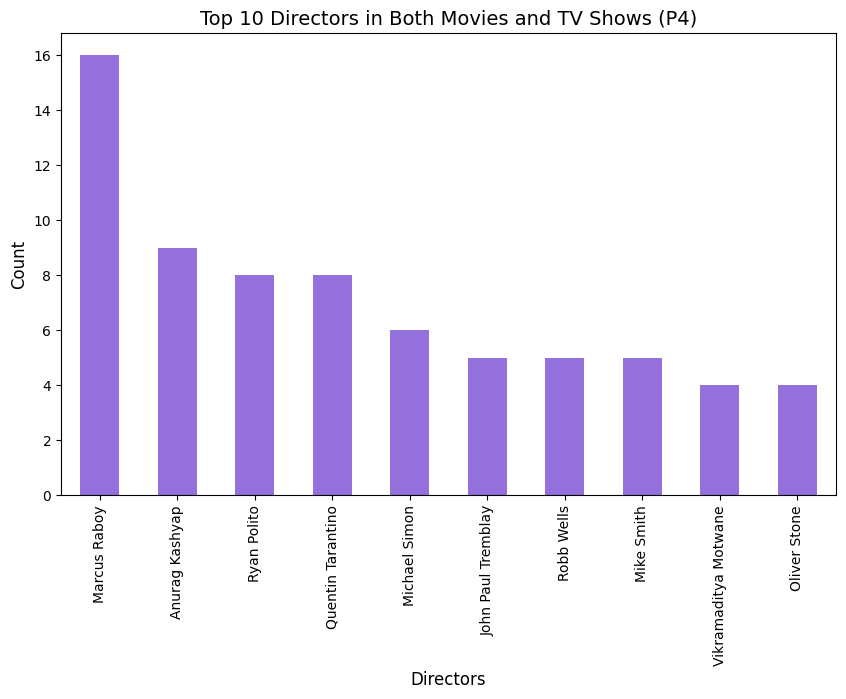

In [ ]:
# Identify directors who are in both TV shows and movies
common_directors = set(tv_show_director_count.index) & set(movie_director_count.index)

# Convert the set of common directors to a list
common_directors = list(common_directors)

# Filter the counts for these directors
common_director_counts = (
    director_count[common_directors]
    .sort_values(ascending=False)
    .head(10)
)

# Plot the top 10 common directors
plt.figure(figsize=(10, 6))
common_director_counts.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Directors in Both Movies and TV Shows (P4)', fontsize=14)
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?



The specific charts were chosen to provide clear visualizations of the top directors across three key segments:
overall directors, TV show directors, and movie directors.
Bar charts were used because they are effective in representing categorical data and comparing the frequency of occurrences across different categories.
The fourth chart highlighting directors involved in both TV shows and movies was included to showcase directors with versatility across content types.

##### 2. What is/are the insight(s) found from the chart?

- The first chart shows the top 10 directors overall, revealing Jan Suter as the most frequent director in the dataset.
- The second chart highlights Alastair Fothergill as the most frequent TV show director.
- The third chart identifies Jan Suter as the most frequent movie director, indicating their dominance in the movie segment.
- The fourth chart reveals Marcus Raboy as the most versatile director, contributing significantly to both movies and TV shows.
These insights showcase the contribution of directors across different types of content and provide a foundation for identifying key contributors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business in the following ways:
- Identifying top-performing directors allows Netflix to focus on collaborations with these creators to produce high-quality content.
- Understanding the balance of contributions in movies vs. TV shows can help optimize investments in specific content types.
- Highlighting directors who work across both movies and TV shows can guide strategic decisions to leverage their versatility.
However, there are potential risks:
- Over-reliance on a few directors may limit the diversity of content and creative approaches, leading to viewer fatigue or loss of interest.
To ensure positive growth, Netflix should maintain a balance between collaborations with established directors and nurturing new talent.

#### Chart - 3 | Count of Content by Rating

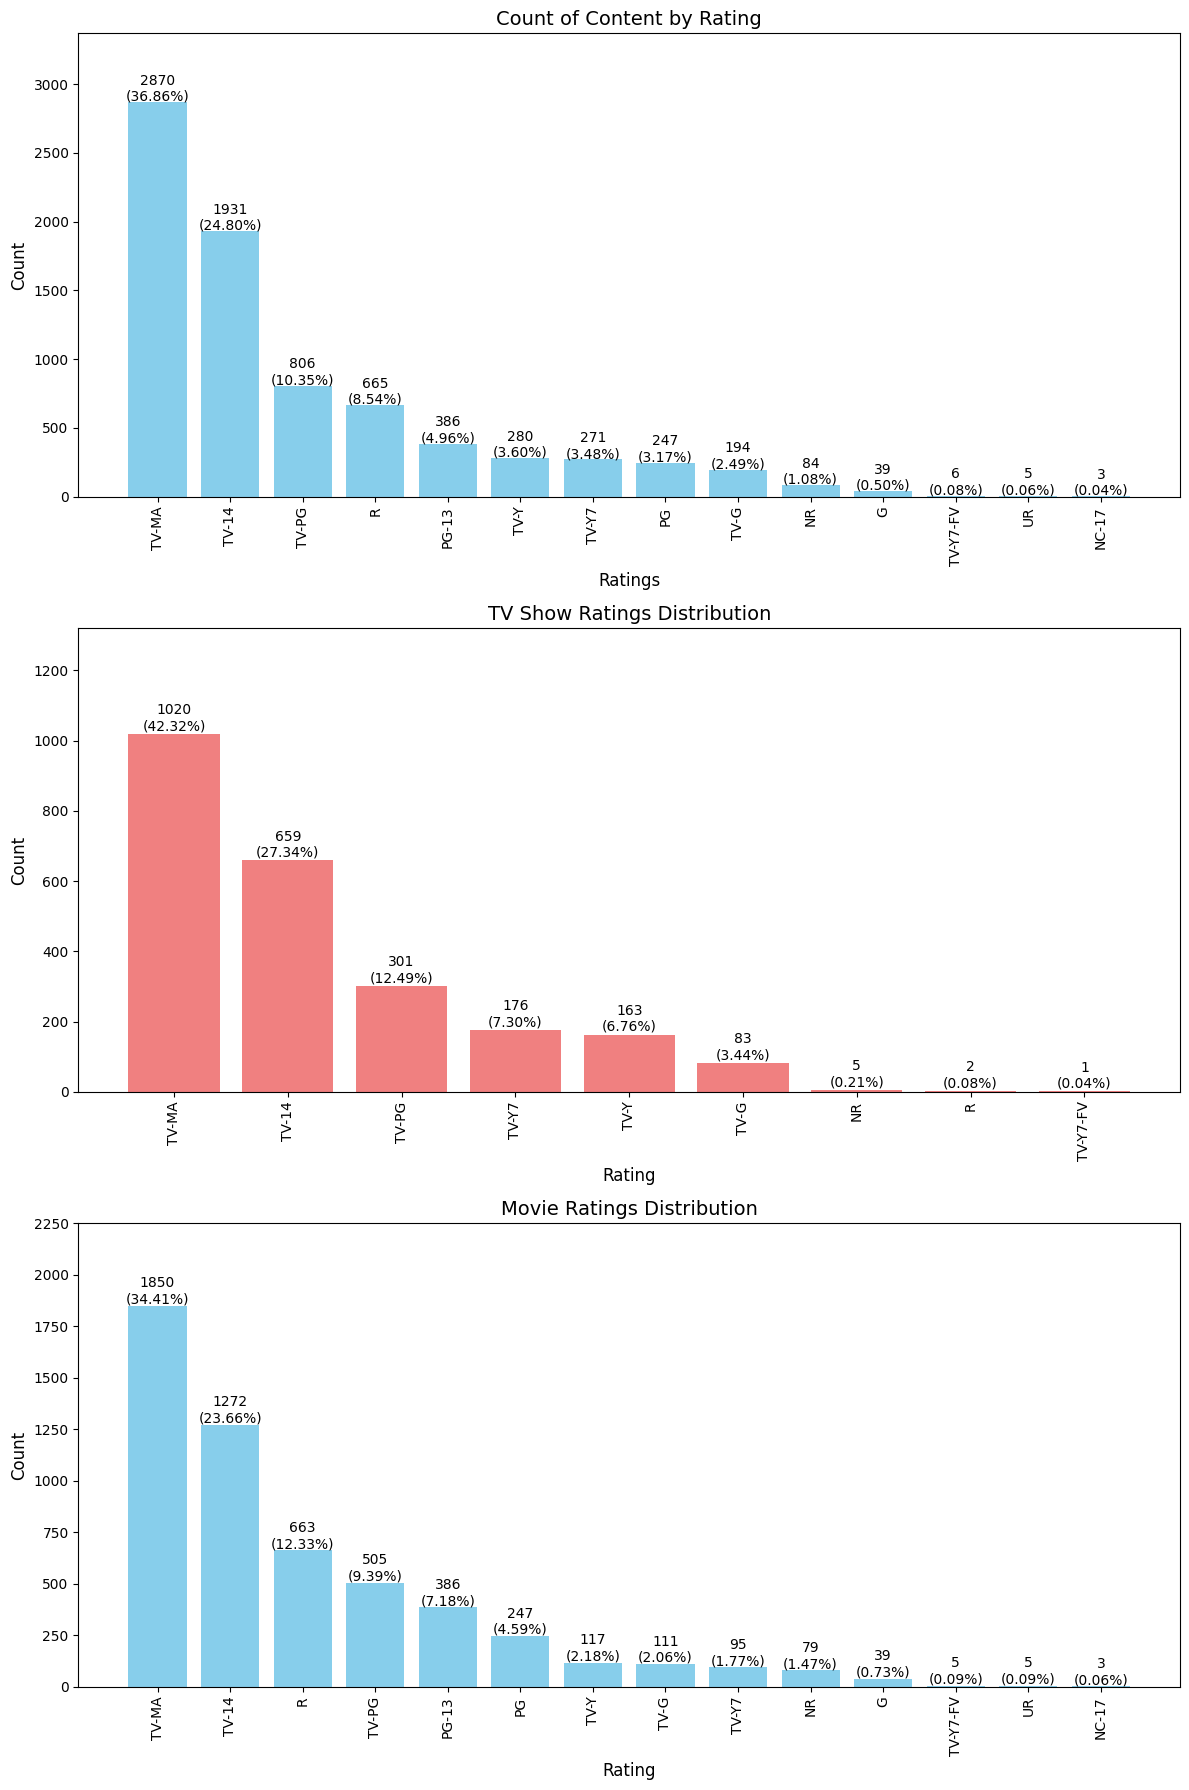

In [ ]:
# Chart - 3 visualization code

# Count the occurrences of each rating
rating_count = df1['rating'].value_counts()

# Calculate percentages for each rating
rating_percent = (rating_count / rating_count.sum()) * 100

# Combine counts and percentages for labeling
labels = [f"{count}\n({percent:.2f}%)" for count, percent in zip(rating_count, rating_percent)]

# Count the occurrences of each rating for TV Shows and Movies
rating_tv_shows = df1[df1['type'] == 'TV Show']['rating'].value_counts()
rating_movies = df1[df1['type'] == 'Movie']['rating'].value_counts()

# Calculate percentages for TV Shows and Movies
rating_tv_shows_percent = (rating_tv_shows / rating_tv_shows.sum()) * 100
rating_movies_percent = (rating_movies / rating_movies.sum()) * 100

# Combine counts and percentages for TV Shows and Movies
tv_show_labels = [f"{count}\n({percent:.2f}%)" for count, percent in zip(rating_tv_shows, rating_tv_shows_percent)]
movie_labels = [f"{count}\n({percent:.2f}%)" for count, percent in zip(rating_movies, rating_movies_percent)]

# Create a figure with 3 subplots: one on top and two below
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot the overall rating distribution
axs[0].bar(rating_count.index, rating_count.values, color='skyblue')
axs[0].set_title('Count of Content by Rating', fontsize=14)
axs[0].set_xlabel('Ratings', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim(0, rating_count.max() + 500)
for i, label in enumerate(labels):
    axs[0].text(i, rating_count.iloc[i] + 10, label, ha='center', fontsize=10)

# Plot TV Show Ratings Distribution
axs[1].bar(rating_tv_shows.index, rating_tv_shows, color='lightcoral')
axs[1].set_title('TV Show Ratings Distribution', fontsize=14)
axs[1].set_xlabel('Rating', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0, rating_tv_shows.max() + 300)
for i, label in enumerate(tv_show_labels):
    axs[1].text(i, rating_tv_shows.iloc[i] + 10, label, ha='center', fontsize=10)

# Plot Movie Ratings Distribution
axs[2].bar(rating_movies.index, rating_movies, color='skyblue')
axs[2].set_title('Movie Ratings Distribution', fontsize=14)
axs[2].set_xlabel('Rating', fontsize=12)
axs[2].set_ylabel('Count', fontsize=12)
axs[2].tick_params(axis='x', rotation=90)
axs[2].set_ylim(0, rating_movies.max() + 400)
for i, label in enumerate(movie_labels):
    axs[2].text(i, rating_movies.iloc[i] + 10, label, ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The following three bar charts were selected to analyze Netflix content distribution:
1. **Count of Content by Rating**: This chart shows the overall distribution of ratings across all content types, helping us identify the primary audience Netflix targets.
2. **TV Show Ratings Distribution**: This chart focuses specifically on the ratings of TV shows, allowing us to understand the audience segmentation for TV series.
3. **Movie Ratings Distribution**: This chart highlights the ratings of movies, showcasing the type of audiences that Netflix movies cater to.

Bar charts are ideal for comparing categorical data (ratings) and visualizing their counts. Including percentages on the bars ensures the insights are proportionally clear and actionable.



##### 2. What is/are the insight(s) found from the chart?

**Insights from the Count of Content by Rating:**
- **TV-MA (36.86%) and TV-14 (24.80%) ratings dominate**, indicating that Netflix primarily targets a mature audience.
- Family-friendly ratings (e.g., PG, TV-Y, TV-G) form a smaller portion of the total content, suggesting less focus on child-friendly or family-oriented programming.

**Insights from the TV Show Ratings Distribution:**
- **TV-MA (42.32%) and TV-14 (27.34%) ratings dominate TV shows**, highlighting that Netflix’s series are heavily geared toward older audiences.
- Family-friendly TV shows (e.g., TV-Y, TV-G) make up only a small fraction, suggesting limited content targeting children and families in the TV show segment.

**Insights from the Movie Ratings Distribution:**
- **Movies have a slightly more balanced distribution compared to TV shows**:
  - TV-MA (34.41%) and TV-14 (23.66%) remain the most frequent ratings, but **R-rated (12.33%) and PG-13 (7.18%) movies also form a significant share.**
  - Family-friendly ratings (e.g., PG, TV-Y, G) are more prevalent in movies than in TV shows, but still form a small overall percentage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
- **Target Audience Understanding**:
  The dominance of TV-MA and TV-14 ratings highlights Netflix’s success in catering to mature audiences. This aligns well with its content strategy and can help attract and retain subscribers in this segment.
- **Content Planning**:
  Insights about the limited focus on family-friendly content can help Netflix evaluate whether to expand its library in this segment to attract more family-oriented subscribers.
- **Strategic Investment**:
  By knowing that movies dominate the platform, Netflix can allocate more resources to producing high-performing films while balancing its investment in TV shows.

**Potential for Negative Growth:**
- **Limited Family-Friendly Content**:
  With family-friendly ratings accounting for only a small percentage of the total (e.g., G, PG, TV-Y), Netflix risks losing market share to competitors like Disney+ and Amazon Prime, which have stronger portfolios for children and families.
- **Overemphasis on Mature Content**:
  The heavy focus on mature-rated content (TV-MA, TV-14) may alienate family-oriented customers and younger viewers. This narrow targeting could limit Netflix’s audience base in the long run.

**Recommendations to Address Negative Growth:**
1. **Expand Family-Friendly Content**: Increase investments in G, PG, and TV-Y rated movies and TV shows to attract families and younger audiences.
2. **Diversify Ratings for TV Shows**: Introduce more TV-PG and TV-G rated series to appeal to broader demographics.
3. **Balance TV Show and Movie Focus**: While movies dominate, investing in diverse TV shows can balance the offering and attract a varied audience base.

By addressing these gaps, Netflix can maintain its competitive edge while broadening its subscriber base.

#### Chart - 4 | Count of Movies and TV Shows by Country

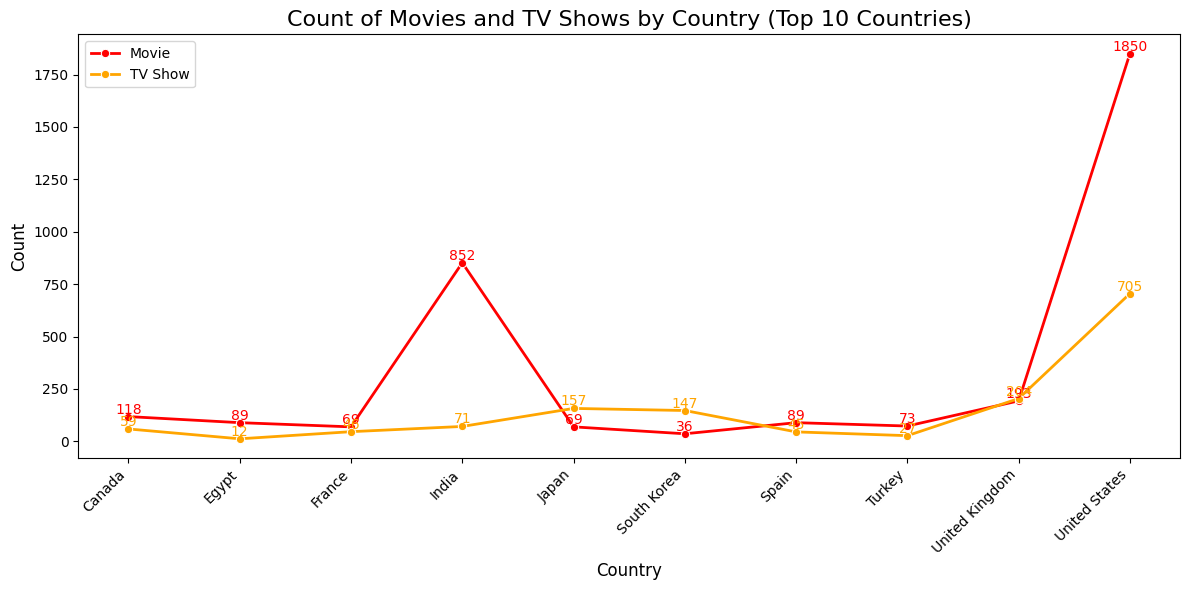

In [ ]:
# Chart - 4 visualization code
# Get the top 10 countries by count
top_10_countries = df['country'].value_counts().head(10).index

# Filter the data for the top 10 countries
top_10_data = df[df['country'].isin(top_10_countries)]

# Group by country and type (TV Show or Movie) to get the count
country_type_count = top_10_data.groupby(['country', 'type']).size().unstack(fill_value=0)

# Plot the line chart
plt.figure(figsize=(12, 6))

# Plot the line for Movies (red) and TV Shows (orange) with solid line for TV Shows
sns.lineplot(data=country_type_count, x=country_type_count.index, y='Movie', color='red', marker='o', label='Movie', linestyle='-', linewidth=2)
sns.lineplot(data=country_type_count, x=country_type_count.index, y='TV Show', color='orange', marker='o', label='TV Show', linestyle='-', linewidth=2)

# Add the count values as points on the graph
for country in country_type_count.index:
    movie_count = country_type_count.loc[country, 'Movie']
    tv_show_count = country_type_count.loc[country, 'TV Show']

    # Movie counts
    plt.text(country, movie_count, f'{movie_count}', color='red', ha='center', va='bottom')

    # TV Show counts
    plt.text(country, tv_show_count, f'{tv_show_count}', color='orange', ha='center', va='bottom')

# Customize plot
plt.title('Count of Movies and TV Shows by Country (Top 10 Countries)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

The line chart displaying the counts of Movies and TV Shows by Country (Top 10 Countries) was chosen to highlight the geographical distribution of different types of content (Movies vs. TV Shows). This chart allows us to easily compare the counts of Movies and TV Shows across the top 10 countries and visually identify the countries with the highest concentration of these content types. Using different colors for Movies (red) and TV Shows (blue) helps distinguish between the two content types clearly.


##### 2. What is/are the insight(s) found from the chart?

- **Top countries**: The United States leads by far in both Movies and TV Shows, with 1850 Movies (37.67%) and 705 TV Shows (14.36%). Other countries like Canada, Egypt, and the United Kingdom also have notable counts.
- **Movie dominance**: For many countries (e.g., United States, India, and Canada), Movies have a significantly higher count than TV Shows. This shows the global preference for Movies, particularly in the United States and India, where Movies contribute heavily to the content available.
- **TV Shows' growing presence**: Countries like South Korea and Japan have a higher proportion of TV Shows compared to Movies, indicating a strong presence of TV Shows in these regions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Positive Business Impact**:
  - Understanding the distribution of Movies and TV Shows by country helps in content strategy. For example, targeting countries like the United States for Movies and South Korea for TV Shows could enhance content relevance and viewership.
  - The data also reveals opportunities for expanding content offerings in countries with a lower proportion of TV Shows, such as India or the United States, where TV Shows could be promoted further.
  
- **Negative Growth**:
  - The dominance of Movies in certain countries (such as the United States and India) suggests that TV Shows are underrepresented, which could negatively affect content diversity and may limit viewership among audiences that prefer TV Shows.
  - A lack of a balanced offering in some countries may result in loss of potential viewers who prefer one content type over the other, making it harder to capture the full audience base.



This analysis helps in formulating strategies for targeting specific content types based on country-specific preferences, ensuring content offerings are aligned with audience demands.

#### Chart - 5 | Genres by Count

The number of unique genres in the dataset is: 42
The number of unique TV show genres in the dataset is: 22


<ipython-input-29-dde87be03ef9>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['listed_in'] = df_tv_shows['listed_in']
<ipython-input-29-dde87be03ef9>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['listed_in'] = df_movies['listed_in']


The number of unique movie genres in the dataset is: 20


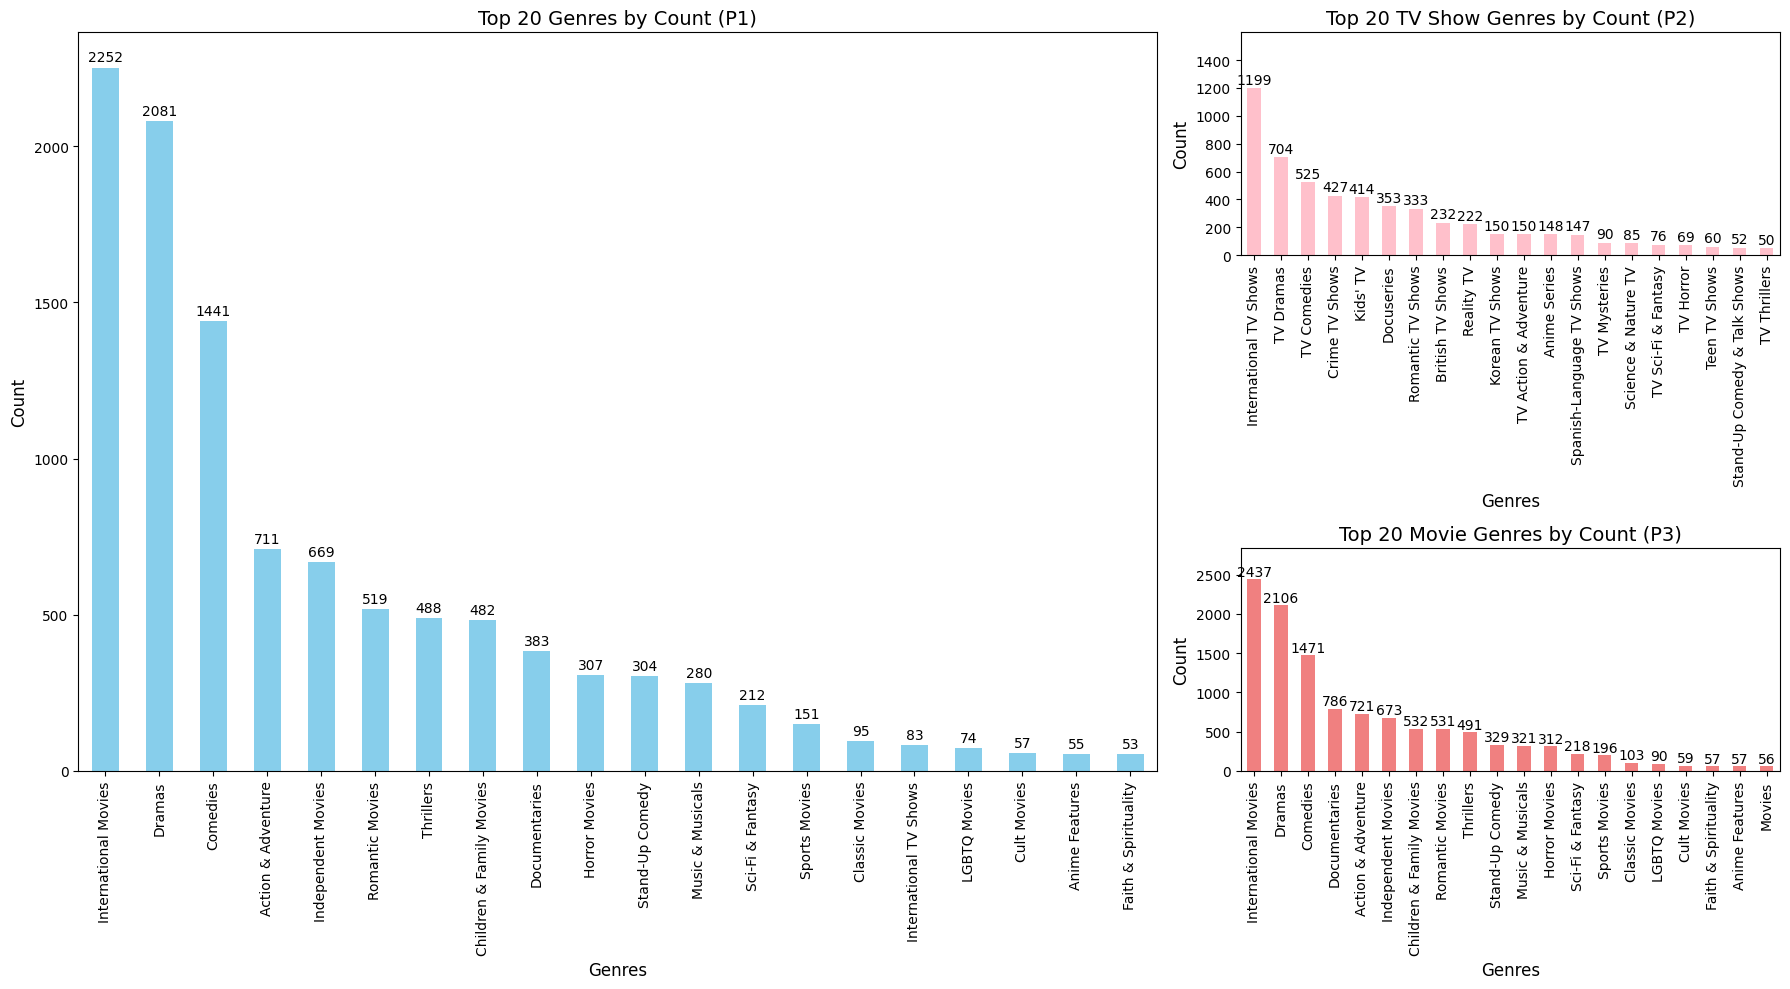

In [ ]:
# Chart - 5 visualization code
# Explode the list into separate rows
df1_exploded = df2.explode('listed_in')
# Set up the figure with gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])

# Count the occurrences of each genre
listed_in_count = df1_exploded['listed_in'].value_counts()

# Display the count of unique genres
unique_genres_count = df1_exploded['listed_in'].nunique()
print(f"The number of unique genres in the dataset is: {unique_genres_count}")

# Plot the top 10 genres by their occurrence
top_genres = listed_in_count.head(20)

# Overall genre count graph (left side)
ax1 = fig.add_subplot(gs[:, 0])  # Spans both rows
top_genres.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Top 20 Genres by Count (P1)', fontsize=14)
ax1.set_xlabel('Genres', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=90)

# Add count values over each bar
for i, v in enumerate(top_genres):
    ax1.text(i, v + 10, str(v), color='black', ha='center', va='bottom')

# ----------------------------------------------------------------

# Filter the dataset for TV Shows only
df_tv_shows = df1[df1['type'] == 'TV Show']

# Split the 'listed_in' column on commas and explode the list into separate rows
df_tv_shows['listed_in'] = df_tv_shows['listed_in']
df_tv_shows_exploded = df_tv_shows.explode('listed_in')

# Count the occurrences of each genre for TV Shows
tv_show_genre_count = df_tv_shows_exploded['listed_in'].value_counts()

# Display the count of unique TV show genres
unique_tv_show_genres_count = df_tv_shows_exploded['listed_in'].nunique()
print(f"The number of unique TV show genres in the dataset is: {unique_tv_show_genres_count}")

# Plot the top 10 TV show genres by their occurrence
top_tv_show_genres = tv_show_genre_count.head(20)

# Top TV show genres graph (top-right)
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
top_tv_show_genres.plot(kind='bar', color='pink', ax=ax2)
ax2.set_title('Top 20 TV Show Genres by Count (P2)', fontsize=14)
ax2.set_xlabel('Genres', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_ylim(0, tv_show_genre_count.max() + 400)
ax2.tick_params(axis='x', rotation=90)

# Add count values over each bar
for i, v in enumerate(top_tv_show_genres):
    ax2.text(i, v + 10, str(v), color='black', ha='center', va='bottom')

# ----------------------------------------------------------------

# Filter the dataset for Movies only
df_movies = df1[df1['type'] == 'Movie']

# Split the 'listed_in' column on commas and explode the list into separate rows
df_movies['listed_in'] = df_movies['listed_in']
df_movies_exploded = df_movies.explode('listed_in')

# Count the occurrences of each genre for Movies
movie_genre_count = df_movies_exploded['listed_in'].value_counts()

# Display the count of unique movie genres
unique_movie_genres_count = df_movies_exploded['listed_in'].nunique()
print(f"The number of unique movie genres in the dataset is: {unique_movie_genres_count}")

# Plot the top 10 movie genres by their occurrence
top_movie_genres = movie_genre_count.head(20)

# Top movie genres graph (bottom-right)
ax3 = fig.add_subplot(gs[1, 1])  # Bottom-right
top_movie_genres.plot(kind='bar', color='lightcoral', ax=ax3)
ax3.set_title('Top 20 Movie Genres by Count (P3)', fontsize=14)
ax3.set_xlabel('Genres', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)
ax3.set_ylim(0, movie_genre_count.max() + 400)
ax3.tick_params(axis='x', rotation=90)

# Add count values over each bar
for i, v in enumerate(top_movie_genres):
    ax3.text(i, v + 10, str(v), color='black', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The chart chosen for the analysis is a **bar chart**, which is ideal for visualizing categorical data like the distribution of genres in the dataset. A **bar chart** effectively displays the frequency of occurrences, making it easy to compare the counts across different genres. By plotting the **Top 10 Genres** in the overall dataset, for TV shows, and for movies separately, we can identify which genres dominate the content available on the platform.

Additionally, bar charts are great for visualizing top N items in a category, which allows us to highlight the most common genres in a clear and concise way.


##### 2. What is/are the insight(s) found from the chart?

The insights derived from the chart are:

- **Dominance of Certain Genres:**
  - **International Movies**, **Dramas**, and **Comedies** are the dominant genres across both movies and TV shows.
  - **International TV Shows** also appear as a prominent genre, indicating a growing global trend in TV content.
  
- **Genre Trends in TV Shows:**
  - TV shows are more diversified in terms of genres, with genres like **Crime TV Shows**, **Reality TV**, and **Korean TV Shows** becoming more popular. This shows the audience's growing interest in niche and diverse types of TV shows.

- **Genre Trends in Movies:**
  - The movie genre distribution highlights a clear preference for mainstream genres such as **International Movies**, **Dramas**, and **Comedies**, with some notable representation of **Documentaries** and **Independent Movies**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can positively impact the business in several ways:

- **Content Strategy:**
  - By identifying the most popular genres, the platform can tailor its content acquisition and production strategies to focus more on genres like **International Movies**, **Dramas**, and **Comedies**.
  - The popularity of **International TV Shows** suggests that expanding the library with more non-Western content could attract a global audience.
  
- **Audience Targeting:**
  - Understanding the genre preferences of users (e.g., interest in **Crime TV Shows**, **Reality TV**, or **Korean TV Shows**) can help in designing personalized recommendations and marketing strategies, leading to higher engagement.
  
- **Regional Expansion:**
  - The high number of **International Movies** and **TV Dramas** signals that there is a broad market for global content, which could help in expanding the platform’s reach in international markets.
  
- **Niche Content Investment:**
  - Genres like **Docuseries**, **Independent Movies**, and **Korean TV Shows** show rising interest. Investing in these niche genres could differentiate the platform from competitors, fostering unique content offerings.

By leveraging these insights, the business can make more informed decisions regarding content investments, audience targeting, and regional expansions, driving higher engagement and subscriber growth.

#### Chart - 6 | Cumulative Count of Movies and TV Shows Added Over Time

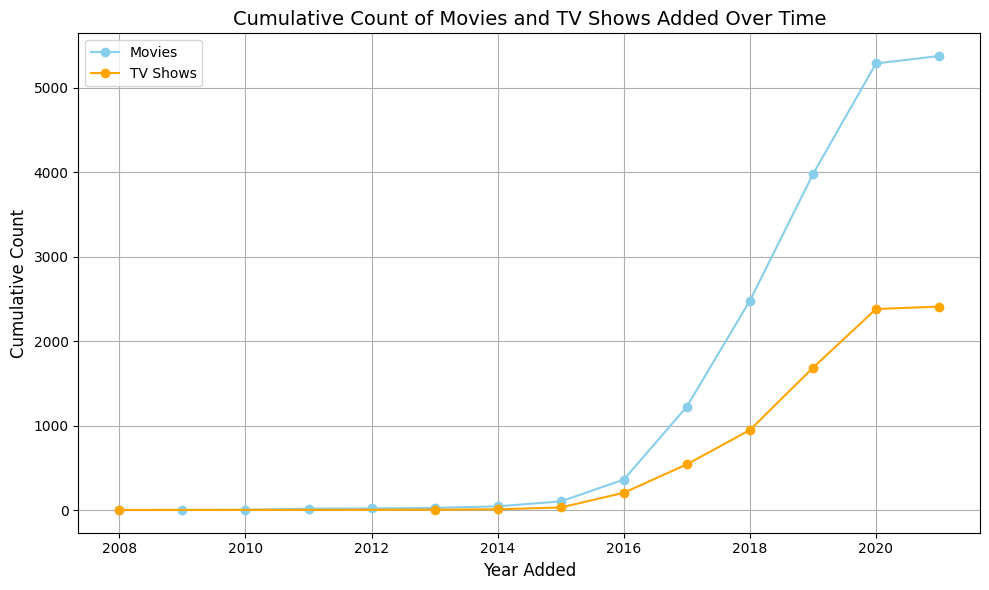

In [ ]:
# Chart - 6 visualization code

# Separate Movies and TV Shows
df_movies = df1[df1['type'] == 'Movie']
df_tv_shows = df1[df1['type'] == 'TV Show']

# Count cumulative movies and TV shows per year
df_movies_yearly = df_movies.groupby('date_added').size().cumsum()
df_tv_shows_yearly = df_tv_shows.groupby('date_added').size().cumsum()

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Movies line
plt.plot(df_movies_yearly.index, df_movies_yearly.values, label='Movies', color='skyblue', marker='o')

# Plot TV Shows line
plt.plot(df_tv_shows_yearly.index, df_tv_shows_yearly.values, label='TV Shows', color='orange', marker='o')

# Customize the chart
plt.title('Cumulative Count of Movies and TV Shows Added Over Time', fontsize=14)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Cumulative Count', fontsize=12)
plt.legend()
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This analysis was chosen to understand the **growth pattern** of content addition (Movies and TV Shows) on Netflix over time. By observing cumulative counts year by year:
- It provides a **longitudinal view** of Netflix's content strategy.
- The separation of Movies and TV Shows allows for a comparative analysis of these two categories, helping us identify which type of content grew faster over the years.


##### 2. What is/are the insight(s) found from the chart?

**Movies:**
- Netflix added movies consistently over the years, but there was a significant increase starting in **2016**.
- Between **2016 and 2020**, the number of movies surged from 361 to 5289, indicating Netflix’s aggressive focus on expanding its movie library during this period.
- Post-2020, the growth slowed down, with fewer additions in 2021 compared to previous years.

**TV Shows:**
- The addition of TV Shows was initially slower but started accelerating significantly in **2016**.
- Between **2016 and 2020**, Netflix added over **2000 TV Shows**, showing that TV Shows became a key focus area during this time.
- By **2021**, the cumulative count of TV Shows reached **2410**, showing a more balanced growth compared to movies.

**Overall Insights:**
- Both Movies and TV Shows saw exponential growth post-2016, which aligns with Netflix's global expansion and investment in content creation.
- The data suggests Netflix initially prioritized Movies, but TV Shows saw substantial growth starting in 2016.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a **positive business impact** in the following ways:

1. **Content Strategy:**
   - Understanding the growth trends can help Netflix focus on categories with higher demand. For example, if TV Shows saw higher engagement, Netflix can increase its investment in series production.

2. **Targeting Specific Audiences:**
   - The shift in content addition patterns (e.g., the surge in TV Shows post-2016) indicates Netflix's effort to cater to a broader audience. This analysis helps reinforce decisions to diversify the content library further.

3. **Marketing and Subscription Growth:**
   - Highlighting growth in both Movies and TV Shows can be used in marketing campaigns to attract new subscribers, emphasizing the platform's vast and growing library.

4. **Competitive Positioning:**
   - The trends demonstrate Netflix's ability to scale its content rapidly, a key competitive advantage against rivals. It can guide decisions about maintaining this growth to stay ahead in the streaming market.



#### Chart - 7 | Cumulative Count of Movies and TV Shows by Release Year

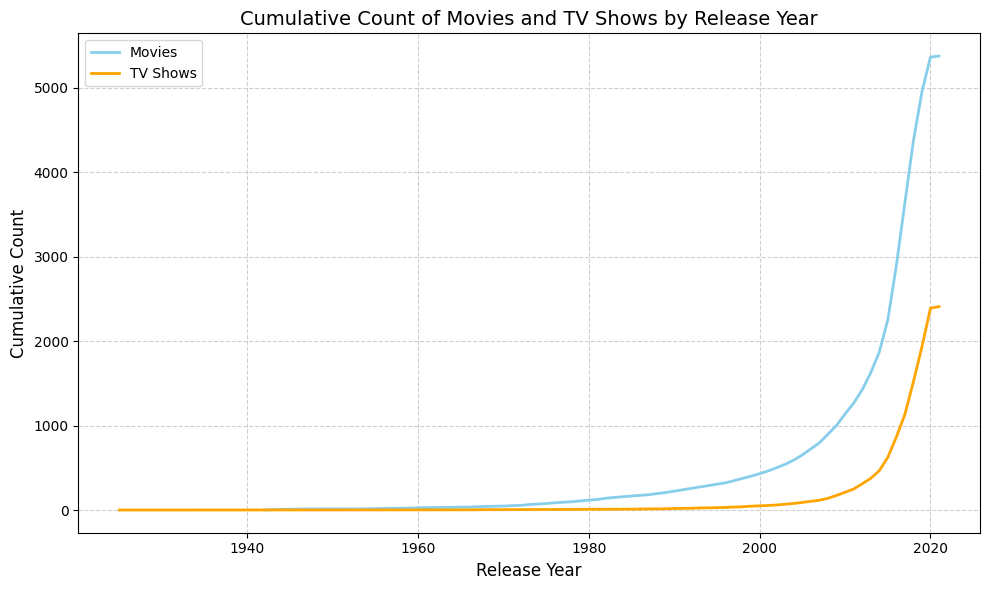

In [ ]:
# Chart - 7 visualization code
import matplotlib.pyplot as plt

# Separate Movies and TV Shows
df_movies = df1[df1['type'] == 'Movie']
df_tv_shows = df1[df1['type'] == 'TV Show']

# Count cumulative Movies and TV Shows by release year
df_movies_release_year = df_movies.groupby('release_year').size().cumsum()
df_tv_shows_release_year = df_tv_shows.groupby('release_year').size().cumsum()

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Movies line
plt.plot(df_movies_release_year.index, df_movies_release_year.values, label='Movies', color='skyblue', linewidth=2)

# Plot TV Shows line
plt.plot(df_tv_shows_release_year.index, df_tv_shows_release_year.values, label='TV Shows', color='orange', linewidth=2)

# Customize the chart
plt.title('Cumulative Count of Movies and TV Shows by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Cumulative Count', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the chart
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

   I chose a line chart to visualize the cumulative count of movies and TV shows by release year. The line chart is ideal for showing trends over time and helps us track the growth of content added to Netflix each year. It clearly illustrates the cumulative increase in movies and TV shows, which allows us to observe significant trends, such as the rapid expansion of content after certain years.


##### 2. What is/are the insight(s) found from the chart?

   - **Movies**: There's steady growth, with a sharp increase post-2015, especially after 2020.
   - **TV Shows**: A gradual rise, with significant growth starting around 2015, reflecting Netflix’s increased focus on original content.
   - **Comparison**: Movies have a more pronounced rise after 2015, while TV shows still lag but are catching up, showing a shift towards TV content.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   - **Growth in TV Shows**: The increase in TV shows after 2015 highlights the shift toward more series content, which is likely attracting more viewers.
   - **Movie Trends**: The consistent rise in movie releases, especially after 2020, indicates Netflix’s strong focus on movies, appealing to a diverse audience.
   - **Content Strategy**: Balancing investments in both movies and TV shows helps Netflix stay competitive and cater to different viewer preferences.
   - **Subscriber Retention**: Tailoring content based on these trends will help Netflix improve engagement and subscriber retention.

#### Chart - 8 | Cast Members by Count

The number of unique cast members in the dataset is: 23632
The number of unique TV show cast members in the dataset is: 1266


<ipython-input-32-d3af03ed1e7e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['cast'] = df_tv_shows['cast']
<ipython-input-32-d3af03ed1e7e>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['cast'] = df_movies['cast']


The number of unique movie cast members in the dataset is: 22796


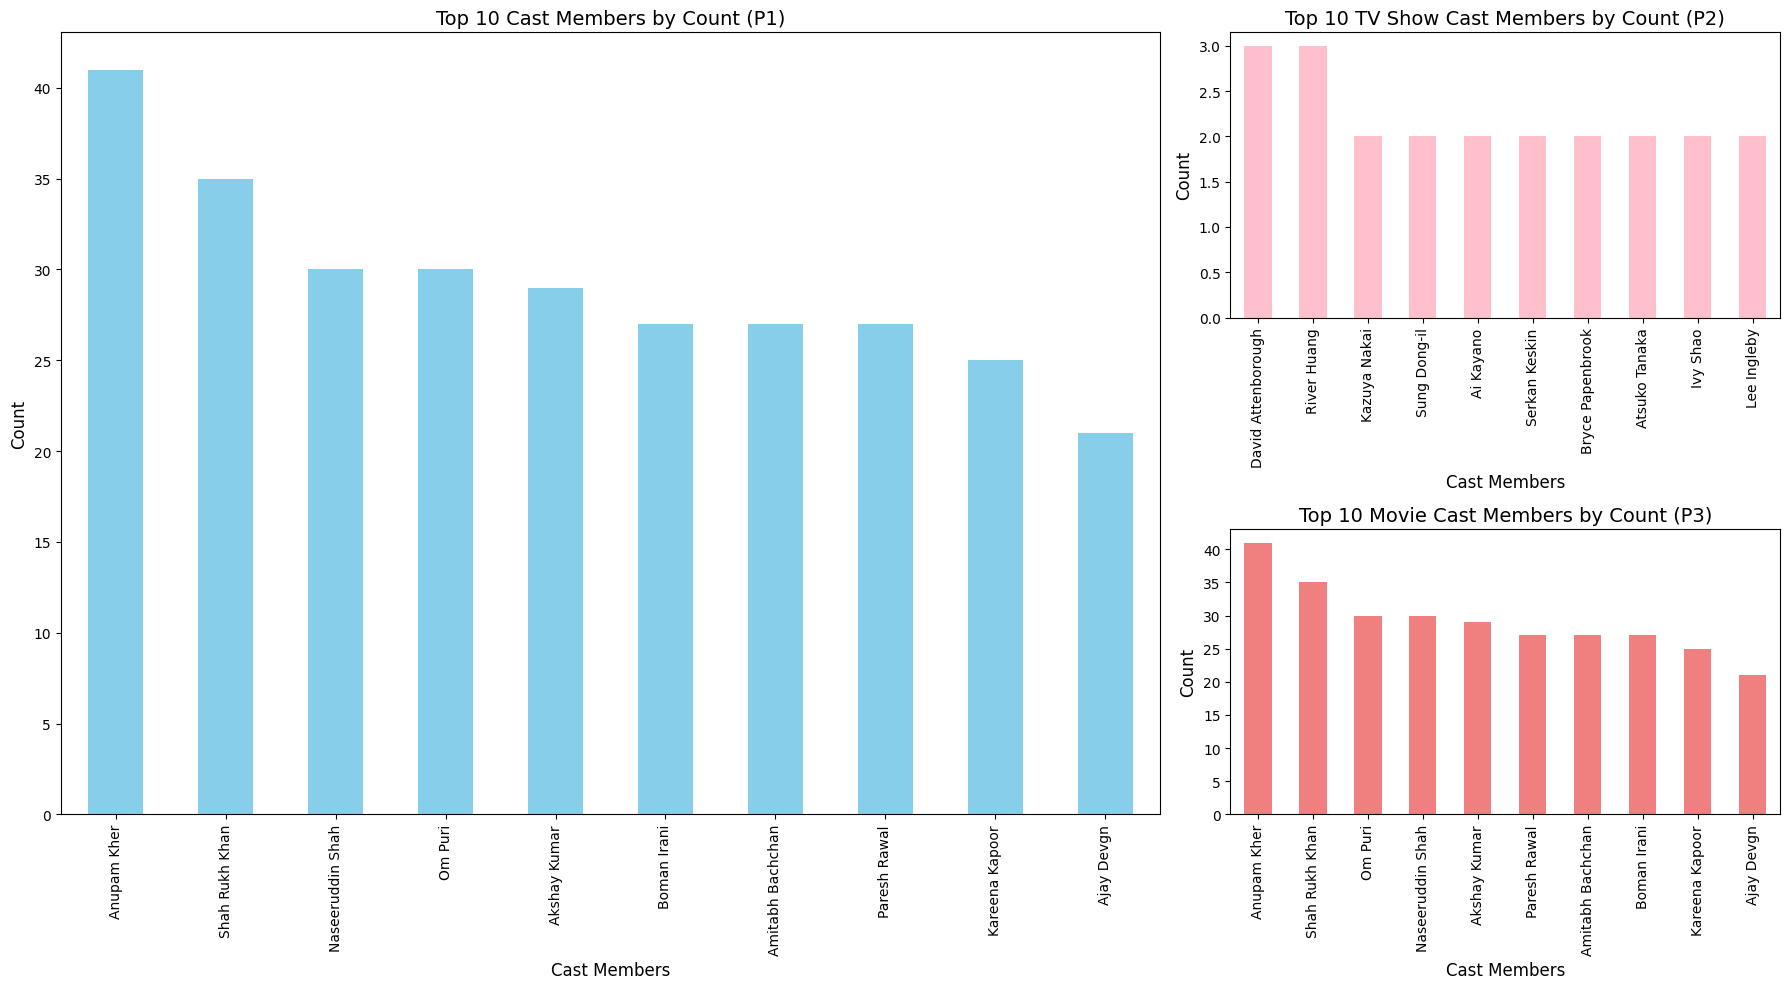

In [ ]:
# Chart - 8 visualization code
# Explode the list into separate rows
df2_exploded_cast = df2.explode('cast')

# Set up the figure with gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])

# Count the occurrences of each cast member
cast_count = df2_exploded_cast['cast'].value_counts()

# Display the count of unique cast members
unique_cast_count = df2_exploded_cast['cast'].nunique()
print(f"The number of unique cast members in the dataset is: {unique_cast_count}")

# Plot the top 10 cast members by their occurrence
top_cast = cast_count.head(10)

# Overall cast count graph (left side)
ax1 = fig.add_subplot(gs[:, 0])  # Spans both rows
top_cast.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Top 10 Cast Members by Count (P1)', fontsize=14)
ax1.set_xlabel('Cast Members', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=90)

#----------------------------------------------------------------

# Filter the dataset for TV Shows only
df_tv_shows = df2[df2['type'] == 'TV Show']

# Split the 'cast' column on commas and explode the list into separate rows
df_tv_shows['cast'] = df_tv_shows['cast']
df_tv_shows_exploded_cast = df_tv_shows.explode('cast')

# Count the occurrences of each cast member in TV shows
tv_show_cast_count = df_tv_shows_exploded_cast['cast'].value_counts()

# Display the count of unique TV show cast members
unique_tv_show_cast_count = df_tv_shows_exploded_cast['cast'].nunique()
print(f"The number of unique TV show cast members in the dataset is: {unique_tv_show_cast_count}")

# Plot the top 10 TV show cast members by their occurrence
top_tv_show_cast = tv_show_cast_count.head(10)

# Top TV show cast graph (top-right)
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
top_tv_show_cast.plot(kind='bar', color='pink', ax=ax2)
ax2.set_title('Top 10 TV Show Cast Members by Count (P2)', fontsize=14)
ax2.set_xlabel('Cast Members', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=90)

#----------------------------------------------------------------

# Filter the dataset for Movies only
df_movies = df2[df2['type'] == 'Movie']

# Split the 'cast' column on commas and explode the list into separate rows
df_movies['cast'] = df_movies['cast']
df_movies_exploded_cast = df_movies.explode('cast')

# Count the occurrences of each cast member in movies
movie_cast_count = df_movies_exploded_cast['cast'].value_counts()

# Display the count of unique movie cast members
unique_movie_cast_count = df_movies_exploded_cast['cast'].nunique()
print(f"The number of unique movie cast members in the dataset is: {unique_movie_cast_count}")

# Plot the top 10 movie cast members by their occurrence
top_movie_cast = movie_cast_count.head(10)

# Top movie cast graph (bottom-right)
ax3 = fig.add_subplot(gs[1, 1])  # Bottom-right
top_movie_cast.plot(kind='bar', color='lightcoral', ax=ax3)
ax3.set_title('Top 10 Movie Cast Members by Count (P3)', fontsize=14)
ax3.set_xlabel('Cast Members', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)
ax3.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

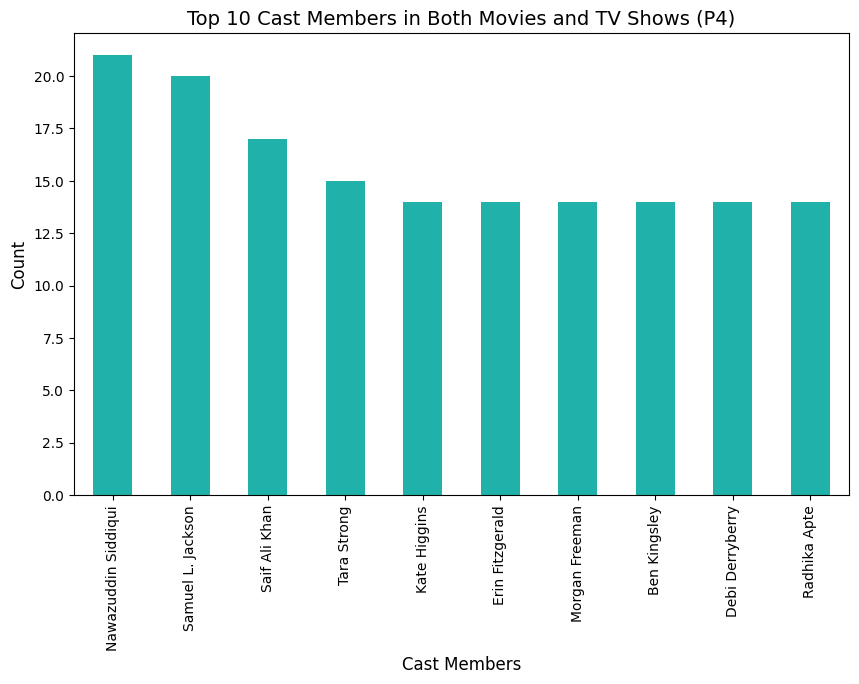

In [ ]:
# Identify cast members who are in both TV shows and movies
common_cast = set(tv_show_cast_count.index) & set(movie_cast_count.index)

# Convert the set of common cast members to a list
common_cast = list(common_cast)

# Filter the counts for these cast members
common_cast_counts = (
    cast_count[common_cast]
    .sort_values(ascending=False)
    .head(10)
)

# Plot the top 10 common cast members
plt.figure(figsize=(10, 6))
common_cast_counts.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Cast Members in Both Movies and TV Shows (P4)', fontsize=14)
plt.xlabel('Cast Members', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

1. **Relevance**: The bar plot was created to visualize the distribution of cast members across TV shows and movies and to identify overlapping actors between both formats.  
2. **Comparison**: The bar plot simplifies the comparison of top cast members across movies, TV shows, and those common to both formats.  
3. **Highlighting Versatility**: The bar plot effectively showcases versatile actors who appear in both movies and TV shows, emphasizing their audience appeal.  

##### 2. What is/are the insight(s) found from the chart?

1. **Dominance of Bollywood Actors**: The overall and movie-specific charts reveal that Bollywood actors such as **Anupam Kher**, **Shah Rukh Khan**, and **Akshay Kumar** dominate, indicating the popularity of Indian cinema in the dataset.  
2. **Limited Repetition in TV Shows**: TV shows have fewer recurring cast members, with **David Attenborough** leading with only **3 appearances**, reflecting greater diversity in casting for this format.  
3. **Versatile Cast Members**: Actors like **Nawazuddin Siddiqui**, **Samuel L. Jackson**, and **Radhika Apte** are prominent in both movies and TV shows, showcasing their adaptability and audience appeal across formats.  


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Positive Business Impact**:  
   - **Strategic Casting**: Identifying versatile actors such as **Nawazuddin Siddiqui** can help producers invest in actors who appeal to both TV and movie audiences, ensuring broader viewership.  
   - **Content Strategy**: Insights into actor dominance can inform decisions to produce more content featuring popular actors, likely increasing engagement.  
   - **Regional Focus**: The dominance of Bollywood actors suggests targeting Indian audiences through localized content, which could drive regional subscriptions.  

2. **Negative Growth Risks**:  
   - **Overreliance on Star Power**: Focusing heavily on a few top actors may reduce opportunities for fresh talent, leading to audience fatigue over time.  
   - **TV Show Casting Trends**: Limited repetition among TV show actors suggests that TV audiences may prioritize variety over familiar faces, which could negatively impact shows relying on known stars.  
   - **Global Representation**: The dominance of Indian actors might overshadow content from other regions, limiting the platform’s global appeal if not balanced.  

3. **Justification**:  
   - The insights suggest both opportunities and risks. Strategic decisions based on these insights should aim to balance popular actor utilization with diverse casting to maintain audience interest and global competitiveness.  

#### Chart - 9 | Distribution of Movie Durations || Distribution of TV Show Seasons

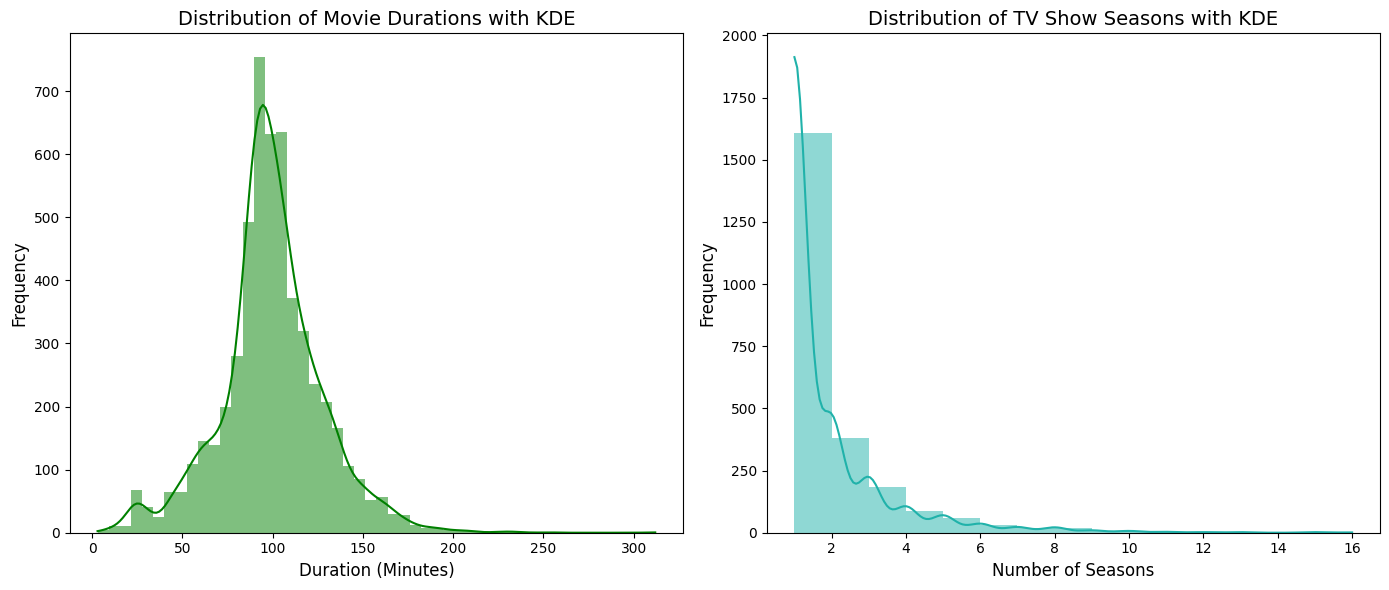

In [ ]:
# Chart - 9 visualization code
# Step 1: Separate Movies and TV Shows
df_movies = df1[df1['type'] == 'Movie']
df_tv_shows = df1[df1['type'] == 'TV Show']

# Step 2: Filter valid durations and seasons
df_movies_valid = df_movies[df_movies['duration_minutes'] > 0]
df_tv_shows_valid = df_tv_shows[df_tv_shows['seasons'] > 0]

# Step 3: Plot histograms with KDE
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Histogram + KDE for Movies' duration
sns.histplot(df_movies_valid['duration_minutes'], bins=50, kde=True, color='green', edgecolor=None, ax=axs[0])
axs[0].set_title('Distribution of Movie Durations with KDE', fontsize=14)
axs[0].set_xlabel('Duration (Minutes)', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

# Histogram + KDE for TV Shows' seasons
sns.histplot(df_tv_shows_valid['seasons'], bins=15, kde=True, color='lightseagreen', edgecolor=None, ax=axs[1])
axs[1].set_title('Distribution of TV Show Seasons with KDE', fontsize=14)
axs[1].set_xlabel('Number of Seasons', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The histogram with KDE (Kernel Density Estimate) was chosen as it provides both the distribution of the data and the underlying trend in one visualization.
For movies, the duration histogram shows how movie durations are distributed, while the KDE line smooths the data to indicate the general trend.
Similarly, for TV shows, the histogram reveals the distribution of seasons, while the KDE highlights the overall pattern in the number of seasons.


##### 2. What is/are the insight(s) found from the chart?

1. **Movies:**
   - The majority of movies have durations concentrated around 100 minutes.
   - Very few movies have durations exceeding 200 minutes, indicating that most movies fall within the standard feature film length.

2. **TV Shows:**
   - Most TV shows have a small number of seasons, with a peak around 1-2 seasons.
   - Very few TV shows have more than 6 seasons, and those with more than 10 seasons are rare.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact business decisions:

1. **Movie Insights:**
   - Knowing that most movies are around 100 minutes long, producers can align new releases with audience expectations for this duration to maximize engagement.
   - Rare long-duration movies might indicate niche genres or experimental films, helping in targeted marketing strategies.

2. **TV Show Insights:**
   - The concentration of TV shows with 1-2 seasons suggests a trend of shorter series, likely due to audience preferences for concise content.
   - Networks can use this insight to invest in limited series or miniseries formats, which are both cost-effective and popular.

**Negative Growth Risks:**
- Overinvesting in long-duration movies or multi-season TV shows may risk poor performance if they deviate from audience preferences. For example, TV shows with more than 10 seasons may struggle to retain audience interest, as indicated by their rarity.

#### Chart - 10 | Duration vs Rating for Movies || Seasons vs Rating for TV Shows

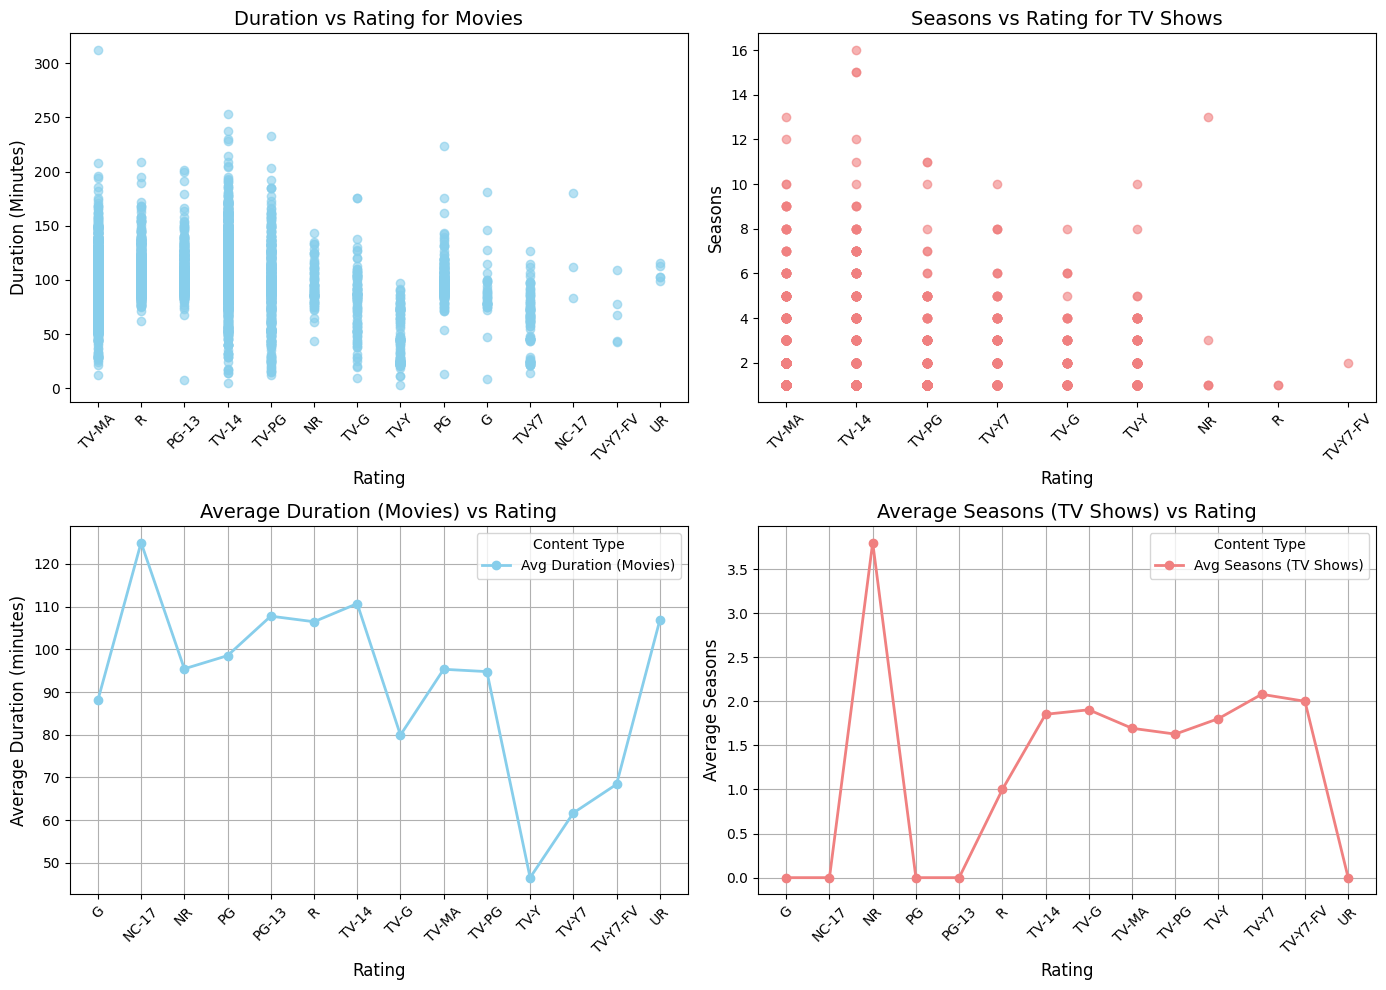

In [ ]:
# Chart - 10 visualization code

# Filter Movies and TV Shows
df_movies = df1[df1['type'] == 'Movie']
df_tv_shows = df1[df1['type'] == 'TV Show']

# Calculate the average duration per rating for Movies
avg_duration_per_rating = df_movies.groupby('rating')['duration_minutes'].mean()

# Calculate the average number of seasons per rating for TV Shows
avg_seasons_per_rating = df_tv_shows.groupby('rating')['seasons'].mean()

# Combine both dataframes to have them together for plotting
rating_values = sorted(set(df_movies['rating']).union(set(df_tv_shows['rating'])))

# Merge the two averages on the common ratings
combined_avg = pd.DataFrame({
    'rating': rating_values,
    'average_duration': avg_duration_per_rating.reindex(rating_values, fill_value=0),
    'average_seasons': avg_seasons_per_rating.reindex(rating_values, fill_value=0)
})

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Duration vs Rating for Movies
df_movies_valid = df_movies[df_movies['duration_minutes'] > 0]
axs[0, 0].scatter(df_movies_valid['rating'], df_movies_valid['duration_minutes'], alpha=0.6, color='skyblue')
axs[0, 0].set_title('Duration vs Rating for Movies', fontsize=14)
axs[0, 0].set_xlabel('Rating', fontsize=12)
axs[0, 0].set_ylabel('Duration (Minutes)', fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Seasons vs Rating for TV Shows
df_tv_shows_valid = df_tv_shows[df_tv_shows['seasons'] > 0]
axs[0, 1].scatter(df_tv_shows_valid['rating'], df_tv_shows_valid['seasons'], alpha=0.6, color='lightcoral')
axs[0, 1].set_title('Seasons vs Rating for TV Shows', fontsize=14)
axs[0, 1].set_xlabel('Rating', fontsize=12)
axs[0, 1].set_ylabel('Seasons', fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Average Duration (Movies) vs Rating
axs[1, 0].plot(combined_avg['rating'], combined_avg['average_duration'], label='Avg Duration (Movies)', color='skyblue', marker='o', linestyle='-', linewidth=2)
axs[1, 0].set_title('Average Duration (Movies) vs Rating', fontsize=14)
axs[1, 0].set_xlabel('Rating', fontsize=12)
axs[1, 0].set_ylabel('Average Duration (minutes)', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)
axs[1, 0].legend(title='Content Type')

# Plot 4: Average Seasons (TV Shows) vs Rating
axs[1, 1].plot(combined_avg['rating'], combined_avg['average_seasons'], label='Avg Seasons (TV Shows)', color='lightcoral', marker='o', linestyle='-', linewidth=2)
axs[1, 1].set_title('Average Seasons (TV Shows) vs Rating', fontsize=14)
axs[1, 1].set_xlabel('Rating', fontsize=12)
axs[1, 1].set_ylabel('Average Seasons', fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)
axs[1, 1].legend(title='Content Type')

# Adjust layout to prevent overlapping and show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The charts were selected to analyze:
   - The relationship between content ratings (e.g., R, PG-13, TV-MA) and movie durations or TV show seasons.
   - The average duration of movies across different ratings to understand how ratings influence movie lengths.
   - The average number of seasons for TV Shows across ratings to identify trends in episodic content.

Scatter plots are used to capture the distribution of durations and seasons across ratings, while line graphs are used for trend analysis in averages, allowing better comparison across ratings.


##### 2. What is/are the insight(s) found from the chart?

**Movies:**
- The scatter plot indicates that:
  - **R-rated movies** have a wide range of durations, with many movies exceeding 120 minutes.
  - **PG and PG-13 movies** generally cluster below 120 minutes, catering to younger audiences.
  - **TV-MA movies** tend to have durations that spread across a wider range, indicating variability in mature content lengths.
  - **G-rated movies** are much shorter on average, as expected for family-friendly content.

- The line graph of average duration shows:
  - **NC-17** and **R-rated** movies have the highest average durations (~120 minutes), likely due to their appeal to mature audiences who may prefer detailed storytelling.
  - **G-rated movies** have the shortest average duration (~60 minutes), likely aligning with the attention spans of children and family audiences.

**TV Shows:**
- The scatter plot reveals that:
  - **TV-MA-rated shows** have more seasons on average, with some extending beyond 10 seasons.
  - **TV-Y and TV-Y7** (kids’ shows) generally have fewer seasons, with most clustering below 5 seasons.
  - Ratings like **TV-14** and **TV-PG** show variability, catering to a broader audience.

- The line graph of average seasons shows:
  - **TV-MA-rated shows** lead with the highest average seasons (~3.5 seasons), reflecting the popularity of long-running mature series.
  - **TV-Y-rated shows** have the lowest average (~1 season), likely due to shorter content formats targeting young audiences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
1. **Content Planning:**
   - Understanding that **R and NC-17-rated movies** have longer average durations can help platforms prioritize such content for mature audiences who seek immersive storytelling.
   - **TV-MA-rated TV Shows** with higher average seasons indicate strong audience retention, making them ideal for boosting subscriptions and long-term viewer engagement.

2. **Marketing Strategies:**
   - Ratings like **PG-13** and **TV-14**, which cater to younger but mature audiences, show significant variability in durations and seasons. These can be promoted for a wide audience base, ensuring higher platform reach.
   - **G-rated content** with shorter durations can be strategically marketed to families, ensuring inclusivity in the platform’s offerings.

3. **User Personalization:**
   - Insights can drive personalized recommendations. For instance, viewers preferring shorter content can be directed to **G-rated movies** or **TV-Y shows**, while binge-watchers can explore **TV-MA-rated shows** with longer seasons.

**Negative Growth Concerns:**
1. **Content Overproduction:**
   - Excessive investment in long-duration content (e.g., NC-17 or R-rated movies) might lead to diminishing returns if audiences prefer shorter formats due to time constraints.

2. **Audience Saturation:**
   - Overemphasis on specific ratings, such as **TV-MA or R**, may alienate family-friendly audiences. A balanced content portfolio across ratings is crucial to maintain growth.

By leveraging these insights effectively, streaming platforms can optimize their content strategy, marketing, and recommendations, ultimately leading to positive business growth.

#### Chart - 11 | Duration by Genre for Movies || Season By Genre for TV Shows

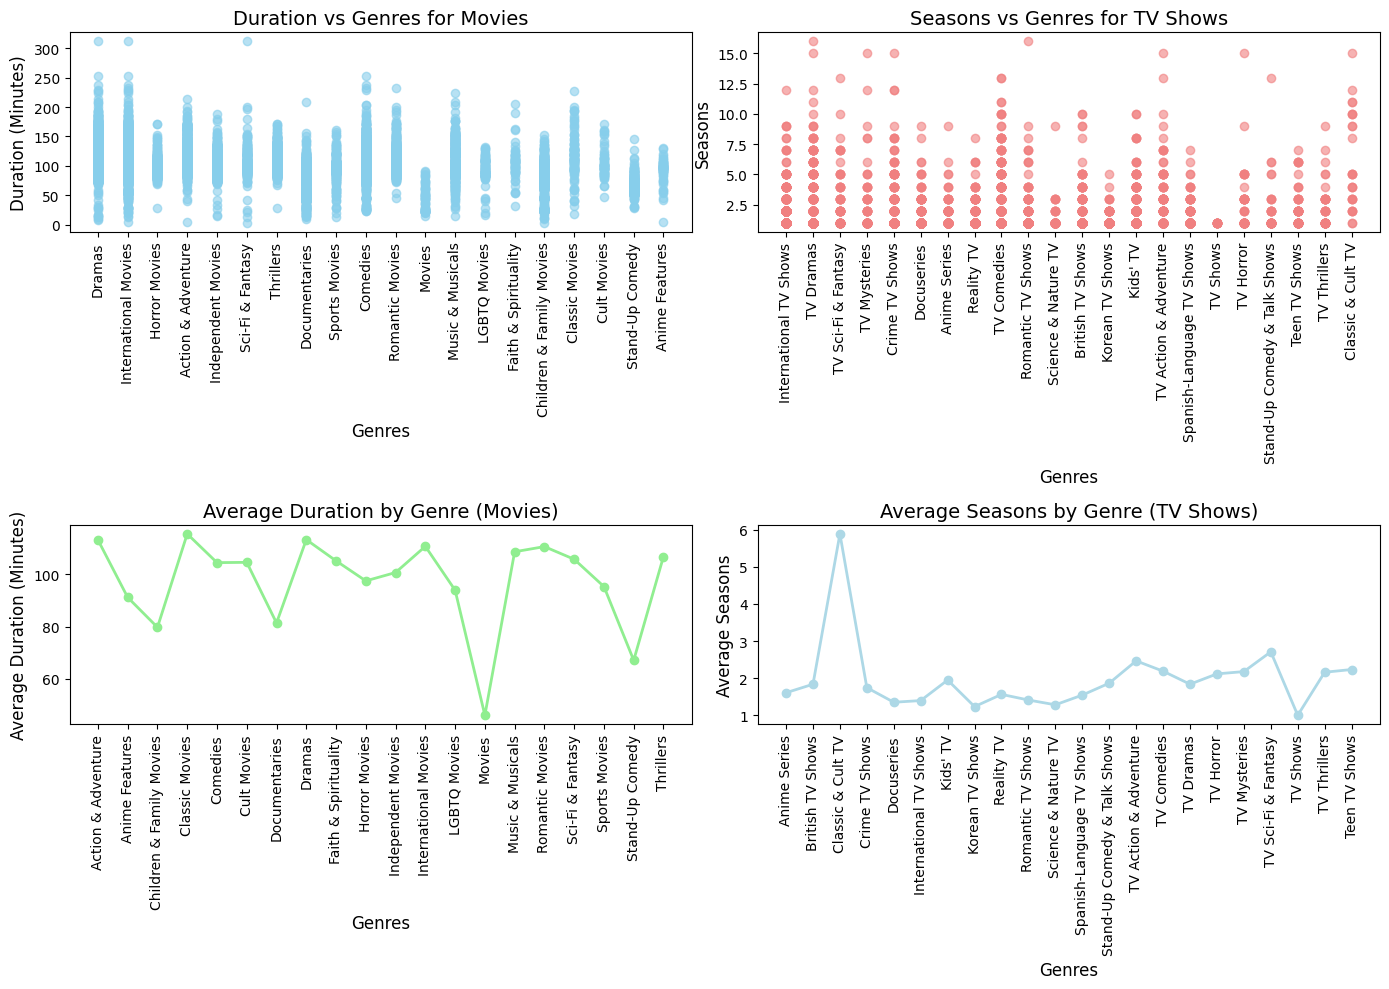

In [ ]:
# Chart - 11 visualization code

# Step 1: Explode the 'listed_in' column and preserve index
df1_exploded = df1.explode('listed_in', ignore_index=False)

# Step 2: Separate Movies and TV Shows
df_movies = df1_exploded[df1_exploded['type'] == 'Movie']
df_tv_shows = df1_exploded[df1_exploded['type'] == 'TV Show']

# Step 3: Filter Movies with valid duration and TV Shows with valid seasons
df_movies_valid = df_movies[df_movies['duration_minutes'] > 0]
df_tv_shows_valid = df_tv_shows[df_tv_shows['seasons'] > 0]

# Step 4: Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Duration vs Genres (listed_in) for Movies
axs[0, 0].scatter(df_movies_valid['listed_in'], df_movies_valid['duration_minutes'], alpha=0.6, color='skyblue')
axs[0, 0].set_title('Duration vs Genres for Movies', fontsize=14)
axs[0, 0].set_xlabel('Genres', fontsize=12)
axs[0, 0].set_ylabel('Duration (Minutes)', fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot 2: Seasons vs Genres (listed_in) for TV Shows
axs[0, 1].scatter(df_tv_shows_valid['listed_in'], df_tv_shows_valid['seasons'], alpha=0.6, color='lightcoral')
axs[0, 1].set_title('Seasons vs Genres for TV Shows', fontsize=14)
axs[0, 1].set_xlabel('Genres', fontsize=12)
axs[0, 1].set_ylabel('Seasons', fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot 3: Average Duration by Genre for Movies (Line Plot)
avg_duration_per_genre = df_movies_valid.groupby('listed_in')['duration_minutes'].mean().reset_index()
axs[1, 0].plot(avg_duration_per_genre['listed_in'], avg_duration_per_genre['duration_minutes'], marker='o', color='lightgreen', linestyle='-', linewidth=2)
axs[1, 0].set_title('Average Duration by Genre (Movies)', fontsize=14)
axs[1, 0].set_xlabel('Genres', fontsize=12)
axs[1, 0].set_ylabel('Average Duration (Minutes)', fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Average Seasons by Genre for TV Shows (Line Plot)
avg_seasons_per_genre = df_tv_shows_valid.groupby('listed_in')['seasons'].mean().reset_index()
axs[1, 1].plot(avg_seasons_per_genre['listed_in'], avg_seasons_per_genre['seasons'], marker='o', color='lightblue', linestyle='-', linewidth=2)
axs[1, 1].set_title('Average Seasons by Genre (TV Shows)', fontsize=14)
axs[1, 1].set_xlabel('Genres', fontsize=12)
axs[1, 1].set_ylabel('Average Seasons', fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlapping and show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

These charts were chosen to analyze the relationship between:
   - **Movie genres** and their durations.
   - **TV show genres** and their number of seasons.
   - Trends in the **average duration of movies** by genre.
   - Trends in the **average number of seasons** for TV shows by genre.

Scatter plots provide an overview of the distribution of durations and seasons across genres, while line graphs highlight trends in average values, making it easier to observe patterns across different genres.


##### 2. What is/are the insight(s) found from the chart?

**Movies:**
- The scatter plot indicates:
  - Genres like **Dramas**, **International Movies**, and **Documentaries** have the widest range of durations, with some movies exceeding 200 minutes.
  - Genres like **Children & Family Movies** and **Anime Features** tend to have shorter durations, clustering below 100 minutes.

- The line graph of average duration shows:
  - **Action & Adventure** and **Classic Movies** have some of the longest average durations (~100–110 minutes), reflecting their detailed storytelling and nostalgic appeal.
  - **Children & Family Movies** and **Stand-Up Comedy** have the shortest average durations (~70–80 minutes), catering to younger audiences or focused content formats.



**TV Shows:**
- The scatter plot reveals:
  - **British TV Shows** and **Crime TV Shows** often have a larger number of seasons, with some extending beyond 10 seasons.
  - Genres like **Kids’ TV** and **Reality TV** generally have fewer seasons, clustering below 5 seasons.

- The line graph of average seasons shows:
  - **British TV Shows** lead with the highest average number of seasons (~5 seasons), highlighting their popularity and longevity.
  - **Anime Series** and **Classic & Cult TV** have the second-highest average seasons (~4–5 seasons), reflecting their niche yet dedicated audiences.
  - Genres like **Kids’ TV** and **Stand-Up Comedy & Talk Shows** have the lowest average seasons (~1 season), as these formats are designed for shorter engagements.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
1. **Content Investment:**
   - **Dramas** and **International Movies** should be prioritized for investment due to their wide range of durations, catering to diverse audience preferences.
   - **British TV Shows** with higher average seasons are a good investment for retaining audiences, as they offer long-term engagement.

2. **Audience Segmentation:**
   - **Children & Family Movies** and **Kids’ TV Shows** can be marketed to families, while genres like **Action & Adventure** and **Crime TV Shows** cater to mature audiences seeking longer, detailed content.

3. **Strategic Content Creation:**
   - Shorter-duration genres like **Stand-Up Comedy** or single-season shows like **Reality TV** can be used to fill gaps in the content library, targeting audiences with limited viewing time.

**Negative Growth Concerns:**
1. **Oversaturation:**
   - Overproducing long-duration movies in genres like **Dramas** or **Action & Adventure** could alienate viewers preferring shorter content formats.
   - Excessive investment in niche genres like **Classic & Cult TV** or **Anime Series** might not yield significant returns due to their limited audience base.

2. **Audience Fatigue:**
   - Long-running genres like **British TV Shows** and **Crime TV Shows** risk audience fatigue if quality declines over time. Careful curation is necessary to maintain audience interest.

By leveraging these insights, streaming platforms can make informed decisions on content acquisition, marketing strategies, and user engagement, ultimately driving positive business growth.

#### Chart - 12 | WordCloud on Titel

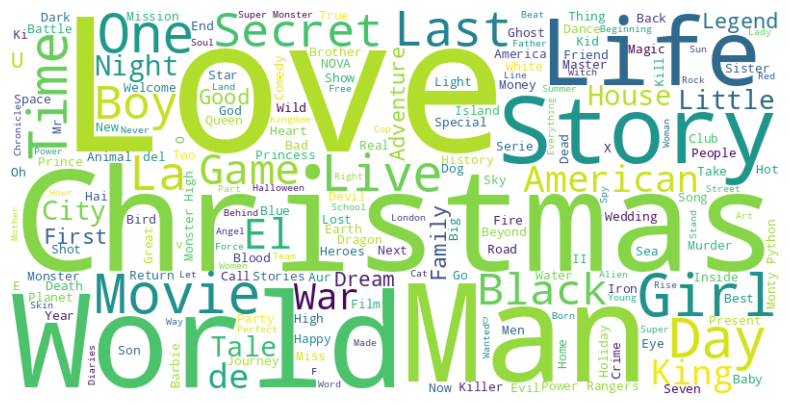

In [ ]:
# Chart - 12 visualization code
from wordcloud import WordCloud, STOPWORDS

# Join all titles together
text = ' '.join(df1['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

The Word Cloud was chosen because it visually highlights the most frequently occurring words in the titles of Netflix content. It is simple yet effective for quickly identifying patterns and popular themes.


##### 2. What is/are the insight(s) found from the chart?

The most prominent words in Netflix titles include **"Love," "World," "Man," "Christmas," "Life," "Story," and "War"**. This suggests that Netflix content heavily features themes related to relationships, holidays (like Christmas), and global or human-centric stories.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact:
- **Positive Growth**: By understanding trending words, Netflix can prioritize creating or acquiring content around themes like "Love," "World," and "Christmas," as they resonate with audiences.
- **Targeted Marketing**: Marketing campaigns can highlight popular themes in titles to attract more viewers.
- **Content Recommendations**: Personalized suggestions can focus on these trending themes for better user engagement.

There are no direct insights leading to negative growth, but relying heavily on repetitive themes could oversaturate the platform, making content less diverse and innovative.







#### Chart - 13 | WordCloud on Description

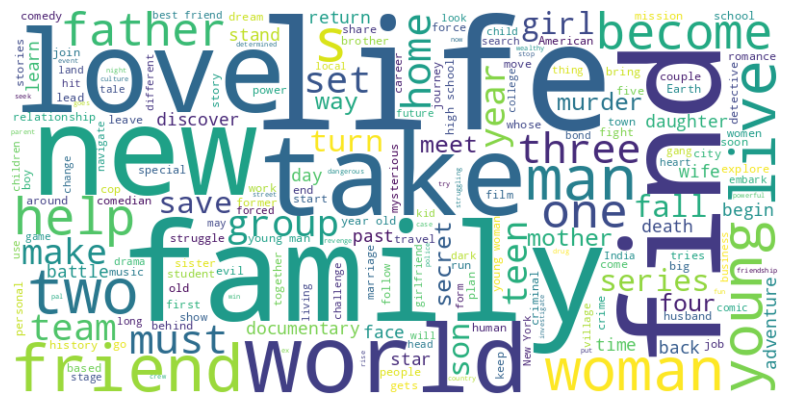

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Define the specific word you want to focus on
target_word = 'Word1'  # Replace 'Word1' with the desired word

# Join all descriptions together
text = ' '.join(df1['description'].dropna())

# Remove common stopwords but keep the target word
stopwords = set(STOPWORDS) - {target_word}

# Generate the word cloud for descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

This Word Cloud was chosen to analyze the most frequently occurring words in the **descriptions** of Netflix content. It helps uncover recurring themes and keywords in how shows and movies are described.


##### 2. What is/are the insight(s) found from the chart?

The most prominent words in the descriptions include **"love," "life," "family," "world," "new," "man," "take," "friend," and "young."** This indicates that Netflix's content descriptions often focus on themes of relationships (love, family, friends), personal growth (new, young, life), and adventure or challenges.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can lead to positive business impacts:
- **Content Strategy**: Netflix can emphasize these recurring themes when acquiring or developing new content since they resonate well with audiences.
- **Targeted Recommendations**: Use keywords like "family," "love," and "world" in recommendation algorithms to better connect viewers with popular content.
- **Marketing Campaigns**: Focus on descriptions with these words to attract audiences seeking emotional, adventurous, or relatable content.

There are no negative insights directly observed here. However, relying heavily on a few words or themes may result in oversaturation and reduced content variety, which could impact audience satisfaction in the long term.

#### Chart - 14 | Correlation Heatmap

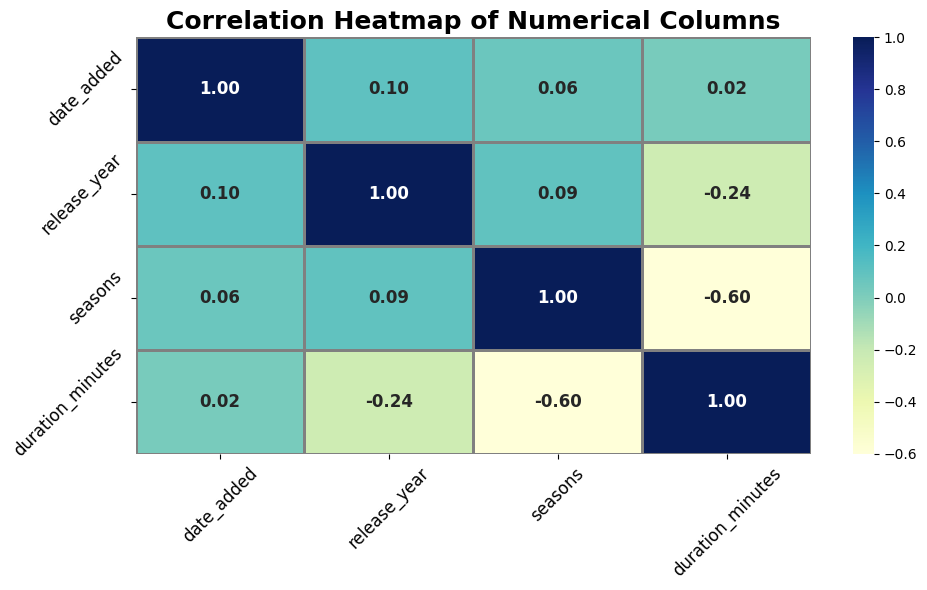

In [ ]:
# Correlation Heatmap visualization code

# Filter only numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))  # Increased size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True,
            annot_kws={"size": 12, "weight": 'bold'}, linewidths=1, linecolor='gray')

# Add title with more styling
plt.title("Correlation Heatmap of Numerical Columns", fontsize=18, fontweight='bold')

# Adjust x and y axis labels to avoid overlap
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen to identify the relationships between numerical columns in the dataset (`date_added`, `release_year`, `seasons`, and `duration_minutes`). A heatmap is a useful tool to visually display how these variables are correlated, providing insights into how strongly they relate to each other. By examining the correlation values, we can pinpoint which features are positively or negatively correlated, helping us understand trends or patterns in the data.


##### 2. What is/are the insight(s) found from the chart?

- **Low correlation between `date_added` and other variables**: The `date_added` variable has low correlation with `release_year` (0.098), `seasons` (0.061), and `duration_minutes` (0.018). This suggests that the date a show or movie was added to the platform does not significantly affect its release year, number of seasons, or duration.
  
- **Negative correlation between `seasons` and `duration_minutes`**: There is a strong negative correlation between `seasons` and `duration_minutes` (-0.603). This indicates that, generally, TV shows with more seasons tend to have shorter individual season durations (in terms of minutes).

- **Moderate negative correlation between `release_year` and `duration_minutes`**: The correlation between `release_year` and `duration_minutes` is -0.239. This suggests a weak inverse relationship, implying that more recent movies and TV shows might have shorter durations on average, but the relationship is not strong.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


- **Positive business impact**:
  - Understanding the weak correlations between `date_added` and other variables can help the business focus on other factors (such as release year, genre, or popularity) for content recommendations or strategic planning rather than focusing on the exact timing of when content is added to the platform.


- **Negative growth concern**:
  - The weak negative correlation between `release_year` and `duration_minutes` suggests that shorter movies or TV shows may be a growing trend, which could impact traditional content that is longer and might appeal to a different audience. If the business ignores the growing preference for shorter content, it might miss out on attracting more viewers who prefer quicker, bite-sized entertainment.

In conclusion, these insights can help guide content strategy, but there is also a risk of missing market trends if not carefully considered.

#### Chart - 15 | Pair Plot

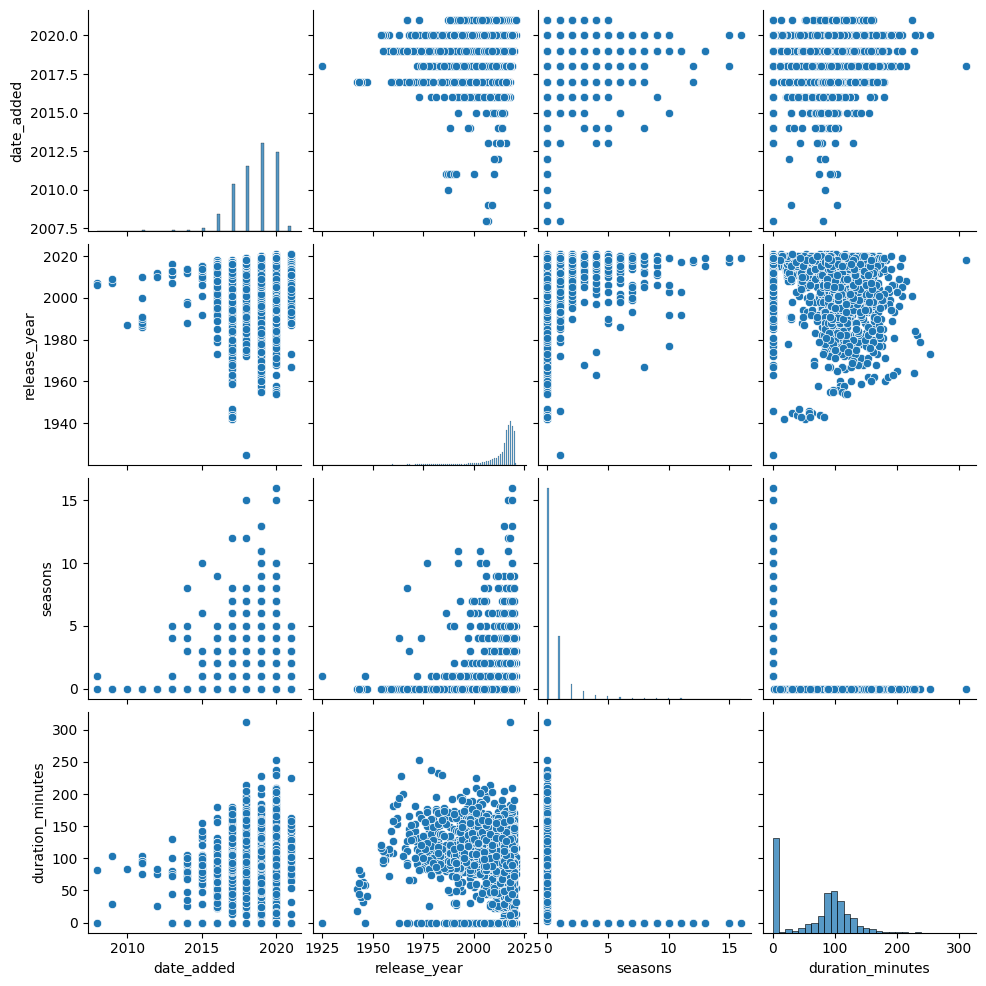

In [ ]:
# Pair Plot visualization code
# Select only the numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64'])

# Create a pair plot
sns.pairplot(numerical_columns)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was selected to visualize the relationships between multiple numerical variables (`date_added`, `release_year`, `seasons`, and `duration_minutes`) at once. It provides a matrix of scatter plots that shows how each pair of variables interacts with each other. This allows for a quick, comprehensive view of correlations and distributions, and helps identify trends, clusters, and potential outliers in the data.


##### 2. What is/are the insight(s) found from the chart?

- **`date_added` vs. `release_year`**: The scatter plot suggests a somewhat spread-out pattern, with no strong linear trend between `date_added` and `release_year`. This further supports the low correlation value, indicating that the date a show or movie was added to the platform does not directly relate to its release year.
  
- **`release_year` vs. `seasons`**: The scatter plot shows a slight clustering around certain values of `release_year` and `seasons`, with a few higher values for `seasons` in more recent years. This could indicate that newer shows tend to have more seasons, though the relationship is not very strong.

- **`release_year` vs. `duration_minutes`**: The plot indicates a scattered distribution, with no clear trend. The weak negative correlation suggests that there isn't a strong inverse relationship between the release year and the duration of the content, though there might be a small trend of shorter content in recent years.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Positive business impact**:
  - The insights suggest that while the timing of content addition (`date_added`) does not significantly affect viewer behavior, understanding the relationship between `seasons` and `duration_minutes` can guide decisions in content creation. For example, shorter TV show durations with more seasons may cater to a broader audience, enhancing viewer retention.
  - Additionally, understanding that newer content tends to have shorter durations could help the business cater to changing preferences for quick-to-watch shows or movies, particularly if the platform is aiming to capture the audience interested in binge-watching.

- **Negative growth concern**:
  - The weak negative correlation between `release_year` and `duration_minutes` might point to a shift towards shorter content in recent years. If the platform continues to release long-duration content without considering these trends, it could alienate viewers who prefer shorter, faster-paced entertainment.

In conclusion, these insights can help fine-tune content strategy for both movies and TV shows, but there is a risk of losing out on a market that favors shorter, more accessible content.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**Refer Data Wrang Part**
- Replaced missing values in the **director** and **cast** columns with 'Unknown'.  
- Replaced missing values in the **country** column with its mode (most frequent value).  
- Replaced missing values in the **date_added** column with its mode.  
- Replaced missing values in the **rating** column with its mode.  
- Dropped rows where **cast** or **director** were missing and saved the result in a new DataFrame named **df2**.  


#### What all missing value imputation techniques have you used and why did you use those techniques?

1. **Replaced missing values in the 'director' and 'cast' columns with 'Unknown':**  
   This approach was used because missing values in these columns might indicate the absence of data, and using 'Unknown' ensures that the data is not dropped unnecessarily, preserving the dataset's integrity.

2. **Replaced missing values in the 'country' column with its mode (most frequent value):**  
   The mode is used because it represents the most common country in the dataset, making it a logical default for missing values without introducing significant bias.

3. **Replaced missing values in the 'date_added' column with its mode:**  
   The mode was chosen as it is the most frequent date of content addition and provides a reasonable approximation for missing values.

4. **Replaced missing values in the 'rating' column with its mode:**  
   For categorical data like ratings, the mode is an appropriate choice as it assigns the most frequently occurring value to the missing entries.

5. **Dropped rows where 'cast' or 'director' were missing (in df2):**  
   This step was performed to create a cleaner subset of the dataset (df2) for specific analyses that require complete information for these columns. This ensures accurate insights for casting and direction-related analyses.

In [ ]:
df_ml.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'seasons',
       'duration_minutes'],
      dtype='object')

In [ ]:
df_ml.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,seasons,duration_minutes
0,TV Show,3%,Unknown,"Joao Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020.0,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,0
1,Movie,7:19,Jorge Michel Grau,"Demian Bichir, Hector Bonilla, Oscar Serrano, ...",Mexico,2016.0,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0,93
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018.0,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0,78
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017.0,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",0,80
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020.0,2008,PG-13,Dramas,A brilliant group of students become card-coun...,0,123


### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

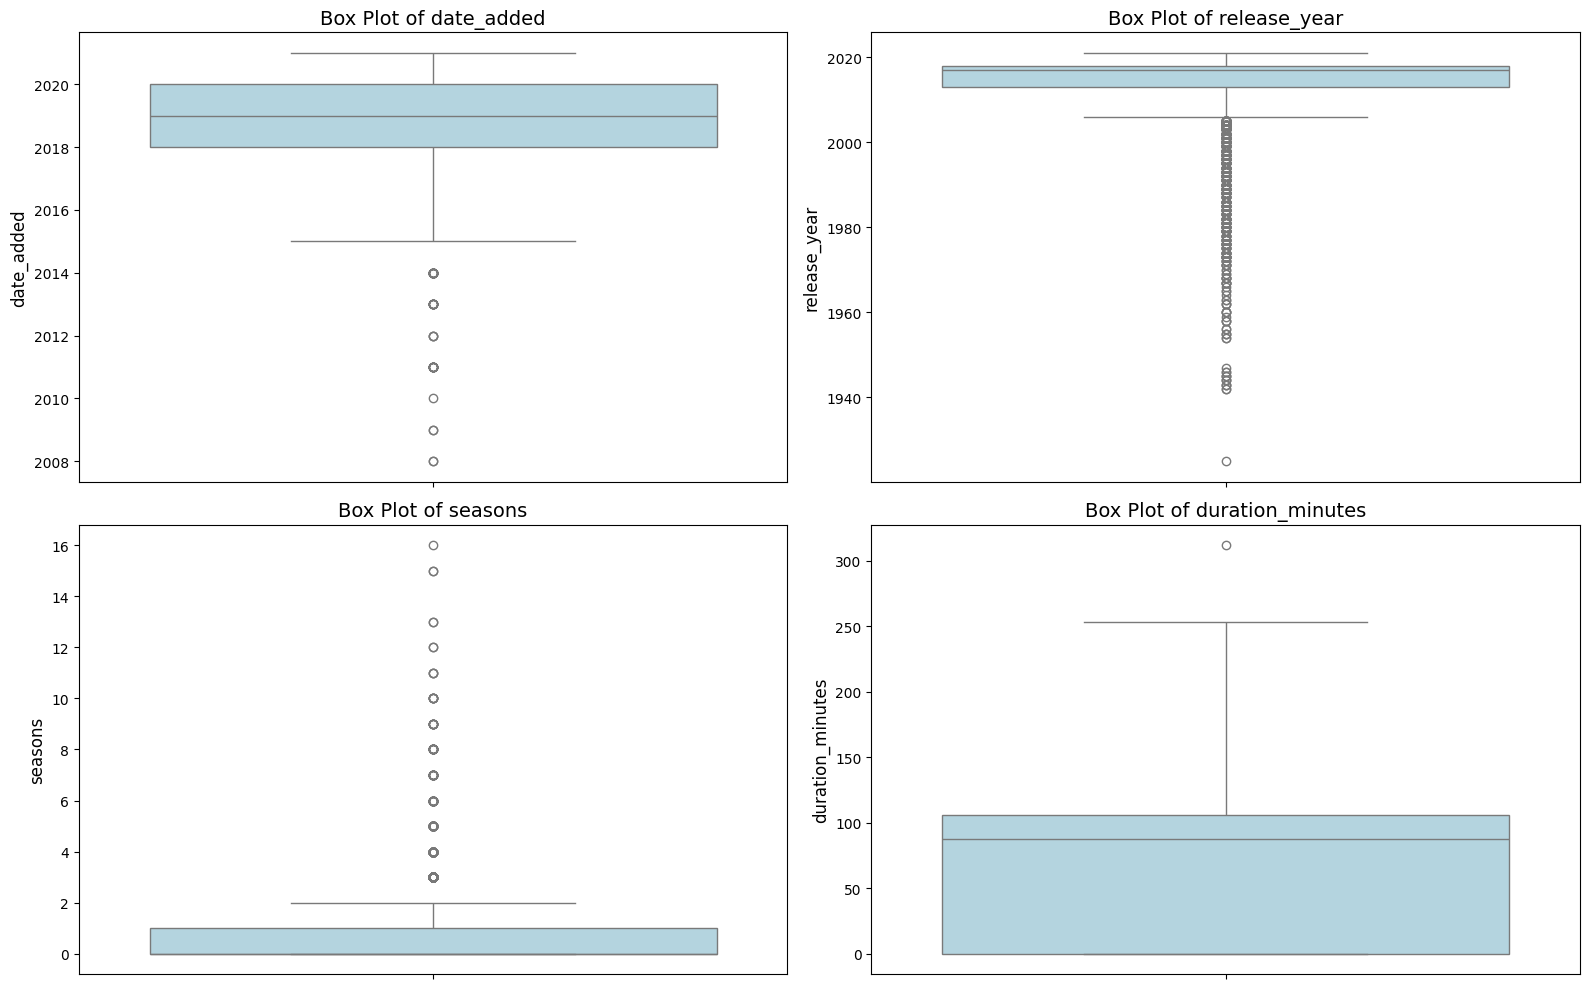

In [ ]:
# Numerical columns to analyze for outliers
numerical_columns = ['date_added', 'release_year', 'seasons', 'duration_minutes']

# Create subplots for boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.boxplot(data=df_ml, y=col, color='lightblue')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
!pip install feature-engine

In [ ]:
# Importing necessary library
from feature_engine.outliers import Winsorizer

# Initialize the Winsorizer with IQR method
winsorizer = Winsorizer(
    capping_method='iqr',  # Use IQR method for detecting outliers
    tail='both',           # Apply to both tails (lower and upper)
    fold=1.5,              # 1.5 is the common factor used in IQR-based Winsorization
    variables=['duration_minutes', 'date_added', 'release_year', 'seasons']  # Apply to specific columns
)

# Apply the Winsorizer to the DataFrame
df_ml = winsorizer.fit_transform(df_ml)



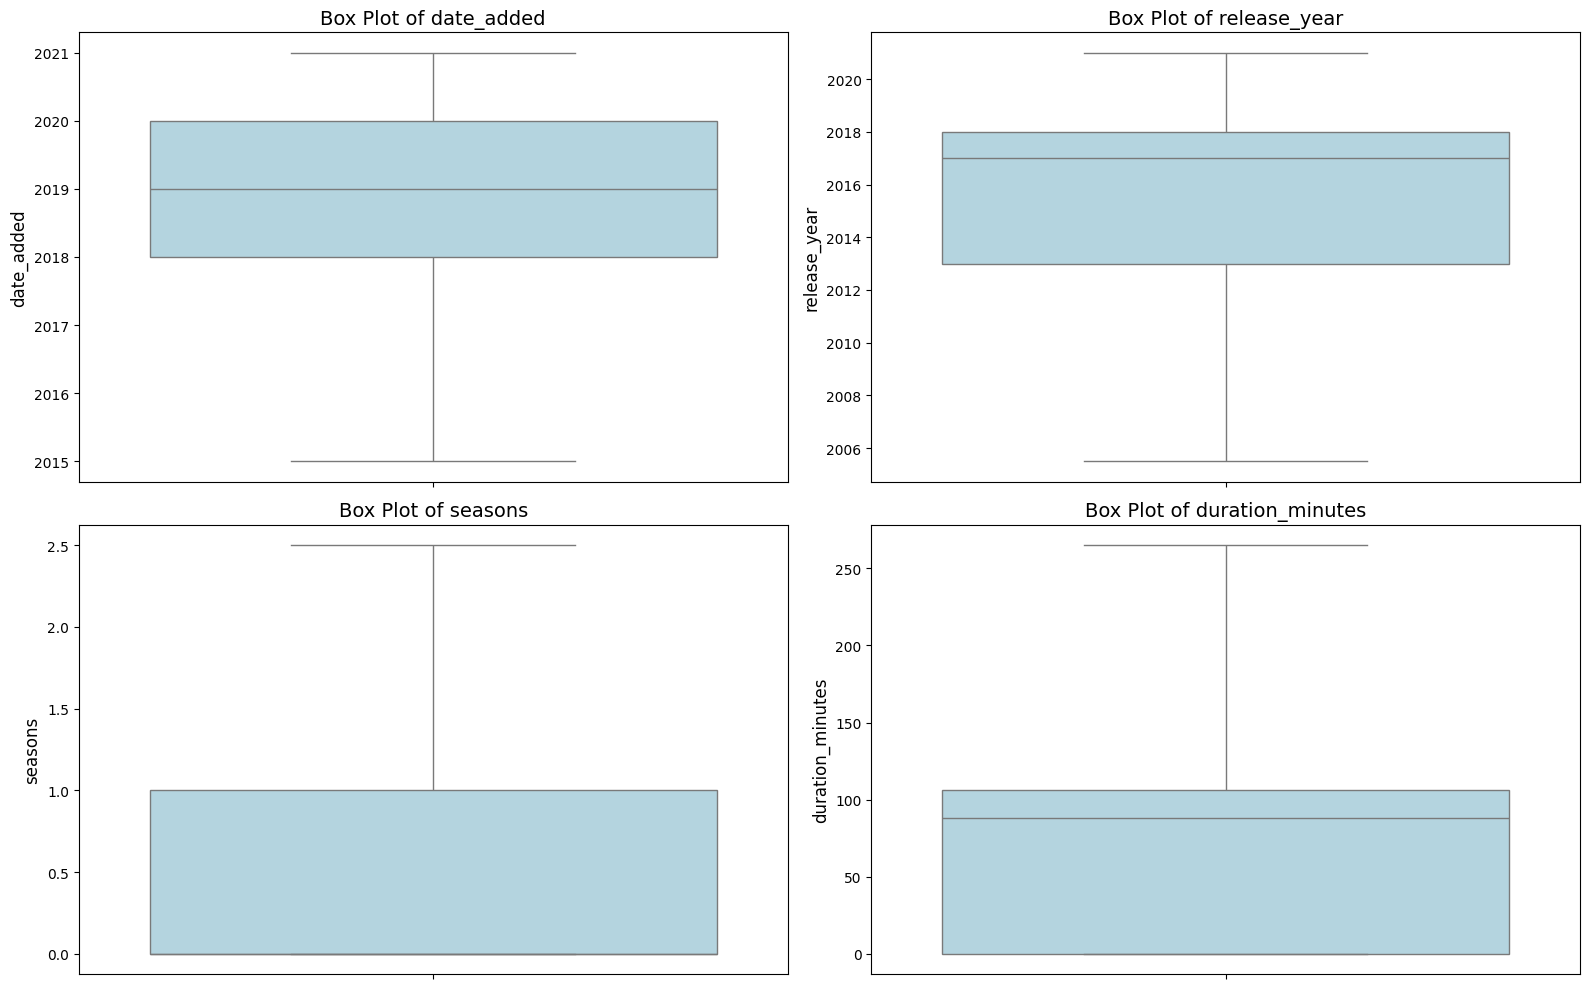

In [ ]:
#Again veryfing outliers

# Create subplots for boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.boxplot(data=df_ml, y=col, color='lightblue')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Outlier Treatment Techniques Used**

1. **Winsorization (IQR method)**:
   - **Reason**: Winsorization using the IQR method was applied to the columns `duration_minutes`, `date_added`, `release_year`, and `seasons`. This technique is commonly used to cap outliers at a defined boundary (lower and upper bounds), calculated using the Interquartile Range (IQR). The fold value of 1.5 is the standard, which is effective in identifying outliers that fall outside 1.5 times the IQR above Q3 and below Q1. By applying this technique, extreme outliers are capped, ensuring that the data distribution remains intact without extreme values influencing the model.
   
2. **Why this technique was used**:
   - **Preservation of Data Integrity**: Winsorization preserves the data by adjusting extreme outliers to a more reasonable range, rather than removing them, which helps retain useful information from the dataset.
   - **Data Distribution**: By capping outliers, the distribution is better aligned with typical data values, improving the model's performance, particularly for algorithms sensitive to extreme outliers (e.g., linear regression, decision trees).
   - **Handling of Skewed Data**: This technique is particularly useful when data is skewed, as it reduces the effect of long-tailed outliers without losing valuable data points.

### 3. Categorical Encoding

In [ ]:
# Use get_dummies to apply one-hot encoding
df_ml = pd.get_dummies(df_ml, columns=['rating', 'type'],dtype=int, drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?




1.	One-Hot Encoding: Applied to the rating and type columns using pd.get_dummies(), converting 'rating', 'type' into binary columns (0 or 1).
2.	Reason: One-hot encoding is used to represent categorical variables without ordinal relationships in a format suitable for machine learning models, preventing any assumptions of order between categories.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Define the columns that need text preprocessing
text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']

#### 1. Expand Contraction

In [ ]:
!pip install contractions

In [ ]:
import contractions

# Function to expand contractions
def expand_contractions(text):
    if isinstance(text, str):  # Ensure input is a string
        return contractions.fix(text)
    return text

# Apply the function to each text column
for column in text_columns:
    df_ml[column] = df_ml[column].apply(expand_contractions)

print("Contractions expanded in text columns.")

Contractions expanded in text columns.


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Function to convert text to lowercase
def to_lowercase(text):
    if isinstance(text, str):  # Ensure input is a string
        return text.lower()
    return text

# Apply lower casing to the selected columns
for column in text_columns:
    df_ml[column] = df_ml[column].apply(to_lowercase)

print("Text converted to lowercase in text columns.")

Text converted to lowercase in text columns.


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

# Function to remove punctuations
def remove_punctuation(text):
    if isinstance(text, str):  # Ensure input is a string
        # Remove punctuation using str.translate
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply the punctuation removal function to the selected columns
for column in text_columns:
    df_ml[column] = df_ml[column].apply(remove_punctuation)

print("Punctuations removed from text columns.")


Punctuations removed from text columns.


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

# Function to remove URLs and words/digits containing digits
def remove_urls_and_digits(text):
    if isinstance(text, str):  # Ensure input is a string
        # Remove URLs
        text = re.sub('[^a-zA-Z]', ' ', text)
    return text

# Apply the function to the selected columns
for column in text_columns:
    df_ml[column] = df_ml[column].apply(remove_urls_and_digits)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure input is a string
        stop_words = set(stopwords.words('english'))  # Set of stopwords
        # Tokenize the text and remove stopwords
        words = text.split()  # Split the text into words
        words = [word for word in words if word not in stop_words]  # Filter out stopwords
        return ' '.join(words)  # Join words back into a string
    return text

# Apply the stopword removal function to the selected columns
for column in text_columns:
    df_ml[column] = df_ml[column].apply(remove_stopwords)

print("Stopwords removed from text columns.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords removed from text columns.


In [ ]:
# Function to remove extra white spaces
def remove_extra_whitespaces(text):
    if isinstance(text, str):  # Ensure input is a string
        # Replace multiple spaces with a single space and strip leading/trailing spaces
        return ' '.join(text.split())
    return text

# Apply the extra white space removal function to the selected columns
for column in text_columns:
    df_ml[column] = df_ml[column].apply(remove_extra_whitespaces)

print("Extra white spaces removed from text columns.")

Extra white spaces removed from text columns.


#### 6. Rephrase Text

In this case, since I'm working on standard text preprocessing, rephrasing isn’t needed. The goal is typically to clean and normalize the text, which we’ve already done with other steps like removing stopwords, punctuation, and extra spaces.

So, rephrasing is not necessary here, and we can skip this step.

#### 7. Tokenization

In [ ]:
# Function to tokenize text
import nltk
from nltk.tokenize import word_tokenize


# Download NLTK punkt tokenizer models if not already downloaded
nltk.download('punkt_tab')

# Function for tokenization
def tokenize_text(text):
    if isinstance(text, str):  # Ensure input is a string
        return word_tokenize(text)  # Tokenize the text into words
    return text

# Apply the tokenization function to the selected columns
for column in text_columns:
    df_ml[column] = df_ml[column].apply(tokenize_text)

print("Text tokenized into words in text columns.")




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Text tokenized into words in text columns.


#### 8. Text Normalization

In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the stemmer
ps = PorterStemmer()

# Function to perform stemming
def stem_text(text):
    if isinstance(text, list):  # Ensure input is a list (tokens from tokenization)
        return [ps.stem(word) for word in text]  # Apply stemming to each token
    return text

# Apply stemming to the tokenized text in the selected columns
for column in text_columns:
    df_ml[column] = df_ml[column].apply(stem_text)

print("Text stemming applied to tokenized text columns.")

Text stemming applied to tokenized text columns.


##### Which text normalization technique have you used and why?

Text Normalization Technique Used:
**Stemming**

**Why Stemming?**
1. Stemming helps to reduce different forms of a word to a common root, such as "running" to "run".
2. It improves consistency in text by consolidating variations of words, which is helpful for text analysis.
3. Stemming reduces the dimensionality of the data, which can improve the performance of machine learning models by making them focus on the root concept rather than variations.
4. Here semantic meaning is not required.

#### 9. Part of speech tagging

I would skip Part of Speech (POS) Tagging for clustering because:

-	Clustering focuses on content patterns: The main goal of clustering is to group similar texts based on their overall meaning, not the grammatical structure. POS tagging identifies word roles (like noun, verb, adjective), but this is not necessary for clustering similar text content.

#### 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, binary = True)

# Apply TF-IDF on the text columns
for column in text_columns:
    # Join the list of tokens back into a single string before applying TF-IDF
    df_ml[column] = df_ml[column].apply(lambda x: ' '.join(x))  # Convert tokenized list back to string

    # Apply TF-IDF and convert it to a dense matrix
    tfidf_matrix = tfidf_vectorizer.fit_transform(df_ml[column])

    # Convert the sparse matrix to a DataFrame and add it back to df_ml
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Merge the original df with the new TF-IDF features
    df_ml = pd.concat([df_ml, tfidf_df], axis=1)

print("TF-IDF applied and features added to the dataframe.")

TF-IDF applied and features added to the dataframe.


##### Which text vectorization technique have you used and why?

1. **Technique Used**: I have used the **Tfidf** vectorization technique.

2. **Why**:
  	It captures the importance of words by balancing their frequency in a document and their rarity across all documents. This helps highlight unique words relevant for classification or clustering tasks.

In [ ]:
# Drop 'text_columns' columns from df_ml
df_ml = df_ml.drop(columns=text_columns)

### 4. Feature Manipulation & Selection

### 1. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the columns to standardize
columns_to_standardize = ['release_year', 'seasons', 'duration_minutes', 'date_added']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the specified columns
df_ml[columns_to_standardize] = scaler.fit_transform(df_ml[columns_to_standardize])

# Verify the changes
print(df_ml[columns_to_standardize].head())

   release_year   seasons  duration_minutes  date_added
0      1.079274  2.786802         -1.327736    1.125849
1      0.181126 -0.594337          0.473120   -1.939531
2     -0.941559 -0.594337          0.182659   -0.406841
3     -1.390633 -0.594337          0.221387   -1.173186
4     -1.615170 -0.594337          1.054041    1.125849


##### Which method have you used to scale you data and why?

Standardization ensures that all features have the same scale, preventing features with larger ranges from dominating the model. It improves the performance and convergence speed of machine learning algorithms like linear regression, SVM, and neural networks. Additionally, it is crucial for distance-based algorithms such as k-nearest neighbors and k-means clustering, as it ensures that all features contribute equally to distance calculations. This process leads to more accurate and efficient models.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
df_ml.shape

(7787, 4185)

I believe dimensionality reduction could be beneficial. Reducing the number of features can help mitigate the “curse of dimensionality,” improve model performance, and speed up computations, especially if many features are sparse or redundant. With so many features, there is a higher risk of overfitting, where the model learns from noise rather than meaningful patterns. Using PCA can help preserve the most important variance in the data while reducing the number of features, which will improve both the interpretability and efficiency of the model.

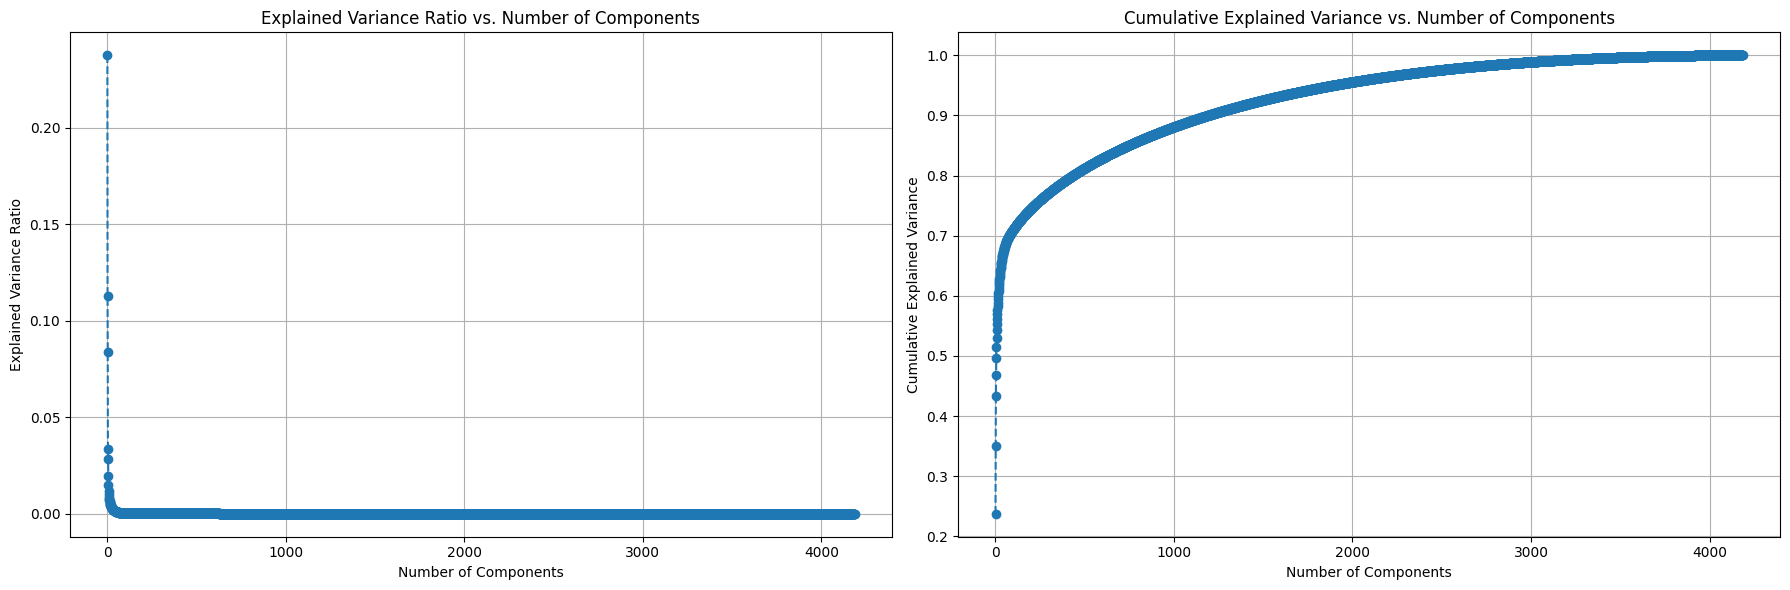

Number of components to explain 90.0% variance: 1191


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Convert the entire df_ml to a sparse matrix
df_ml_sparse = csr_matrix(df_ml.values)  # Convert to sparse matrix

# Step 2: Apply PCA without specifying the number of components initially
pca = PCA()
pca.fit(df_ml_sparse.toarray())  # Fit PCA

# Step 3: Plot the explained variance ratio and cumulative explained variance side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Explained Variance Ratio Plot
axes[0].plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_, marker='o', linestyle='--')
axes[0].set_title('Explained Variance Ratio vs. Number of Components')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].grid(True)

# Cumulative Explained Variance Plot
axes[1].plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
axes[1].set_title('Cumulative Explained Variance vs. Number of Components')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].grid(True)

# Show the plots side by side
plt.tight_layout()
plt.show()

# Step 4: Find the number of components to explain 90% or 95% variance
threshold = 0.90  # Change to 0.90 for 90% cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components = np.argmax(cumulative_variance >= threshold) + 1  # Add 1 for the index

print(f"Number of components to explain {threshold * 100:.1f}% variance: {num_components}")


In [ ]:
# Apply PCA with 1191 components
pca = PCA(n_components= num_components )
df_ml = pca.fit_transform(df_ml_sparse)

In [ ]:
df_ml.shape

(7787, 1191)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal Component Analysis (PCA) for dimensionality reduction on the dataset. PCA is effective because it identifies the directions (principal components) that capture the most variance in the data, allowing for the reduction of features while retaining important information. This technique is particularly useful for high-dimensional datasets, as it reduces the risk of overfitting, improves computational efficiency, and helps in visualizing the data more clearly.

## ***6. ML Model Implementation***

### ML Model - 1 | KMeans clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

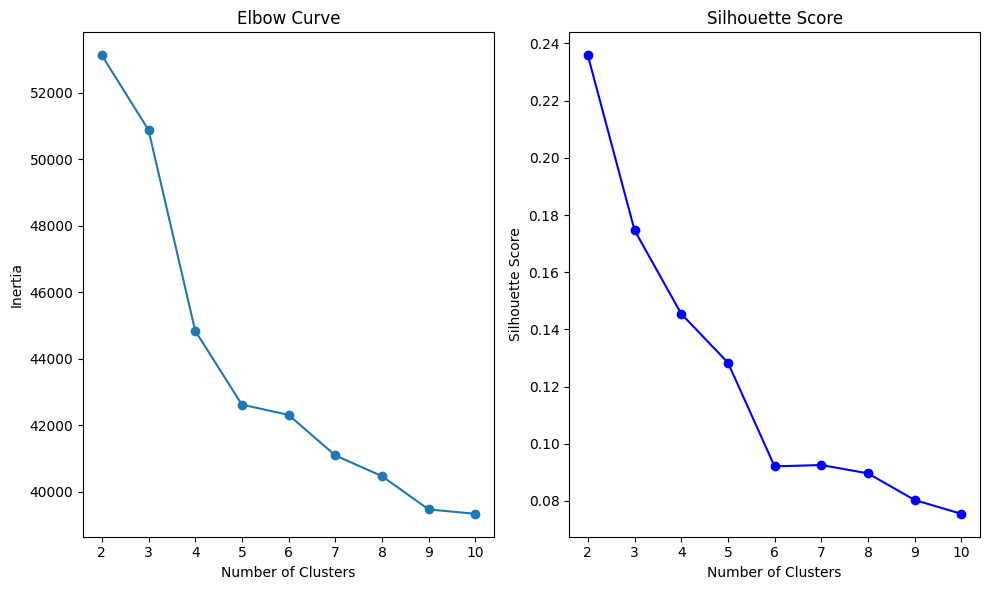

Best number of clusters based on Silhouette Score: 2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Define the range of clusters to test (you can modify this range based on your dataset)
cluster_range = range(2, 11)  # Testing for 2 to 10 clusters (you can expand this range)

# Step 2: Store the inertia and silhouette scores for each number of clusters
inertia = []
silhouette_scores = []

# Step 3: Loop through the range of clusters to perform KMeans and calculate metrics
for num_clusters in cluster_range:
    # Step 3a: Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_ml)  # Fit KMeans to the PCA-transformed data

    # Step 3b: Get the inertia (sum of squared distances) for the Elbow Curve
    inertia.append(kmeans.inertia_)

    # Step 3c: Calculate the silhouette score (a measure of clustering quality)
    silhouette_avg = silhouette_score(df_ml, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Step 4: Plot the Elbow Curve
plt.figure(figsize=(10, 6))

# Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Step 5: Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Display the plots
plt.tight_layout()
plt.show()

# Step 6: Print the best number of clusters based on Silhouette Score
best_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Best number of clusters based on Silhouette Score: {best_num_clusters}')

### ML Model - 2 | Agglomerative Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

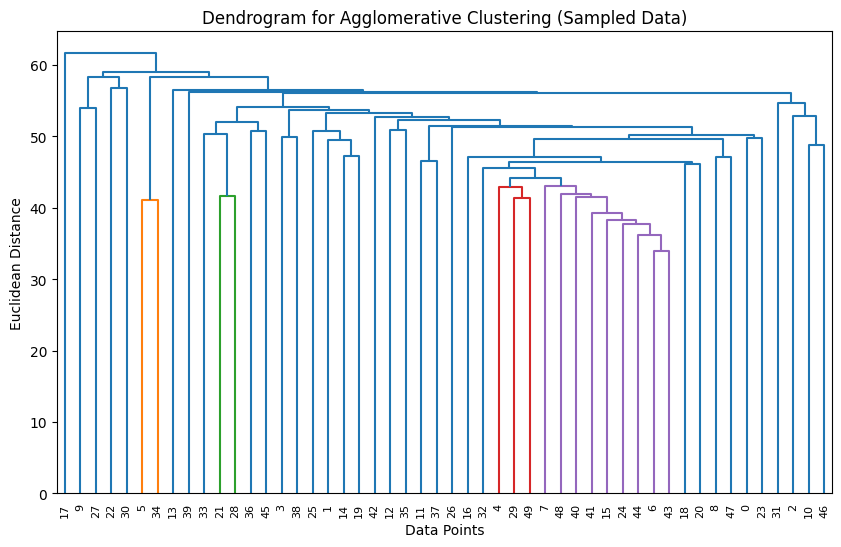

In [ ]:
import pandas as pd

# Convert the numpy array to a pandas DataFrame
df_ml_df = pd.DataFrame(df_ml)

# Sample a smaller subset of the data (e.g., 50 random samples)
sample_size = 50
df_ml_sampled = df_ml_df.sample(n=sample_size)

# Standardize the sampled data
scaler = StandardScaler()
df_ml_scaled_sampled = scaler.fit_transform(df_ml_sampled)

# Perform hierarchical/agglomerative clustering using the linkage method
from scipy.cluster.hierarchy import linkage
Z_sampled = linkage(df_ml_scaled_sampled, method='ward')

# Create the dendrogram for the sampled data
plt.figure(figsize=(10, 6))
dendrogram(Z_sampled)
plt.title('Dendrogram for Agglomerative Clustering (Sampled Data)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

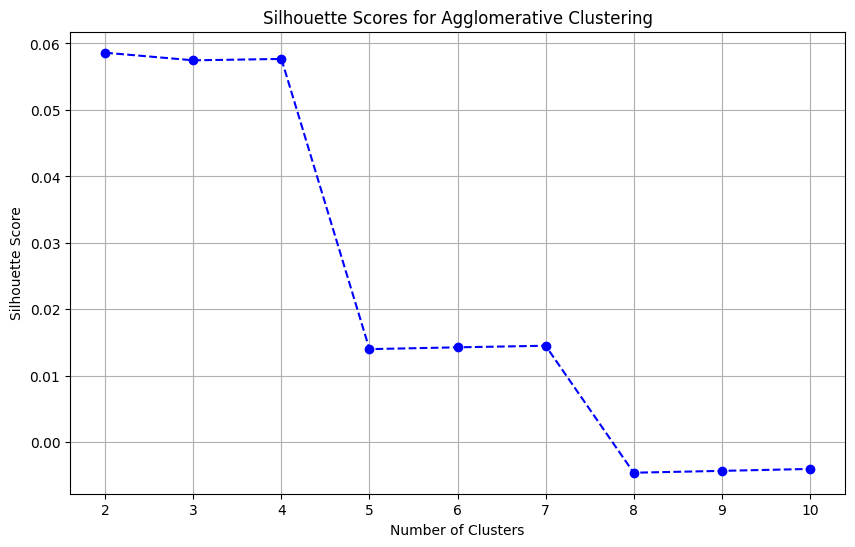

Best number of clusters based on Silhouette Score: 2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the data (optional but recommended for many clustering algorithms)
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(df_ml)

# Define the range of clusters to test
cluster_range = range(2, 11)  # Testing for 2 to 10 clusters

# List to store the silhouette scores for each cluster number
silhouette_scores = []

# Step 1: Loop through the cluster range and perform Agglomerative Clustering
for num_clusters in cluster_range:
    # Apply Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)

    # Fit the model and get the cluster labels
    cluster_labels = agg_clustering.fit_predict(df_ml_scaled)

    # Step 2: Calculate the silhouette score for the clustering
    if len(set(cluster_labels)) > 1:  # Silhouette score is valid only if there is more than one cluster
        silhouette_avg = silhouette_score(df_ml_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # If only one cluster, silhouette score is invalid

# Step 2: Plot the Silhouette Scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='b', linestyle='--')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Step 3: Print the best number of clusters based on Silhouette Score
best_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Best number of clusters based on Silhouette Score: {best_num_clusters}')

### ML Model - 3 | DBSCAN

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Best parameters based on Silhouette Score: eps=0.1, min_samples=3
Best Silhouette Score: -1


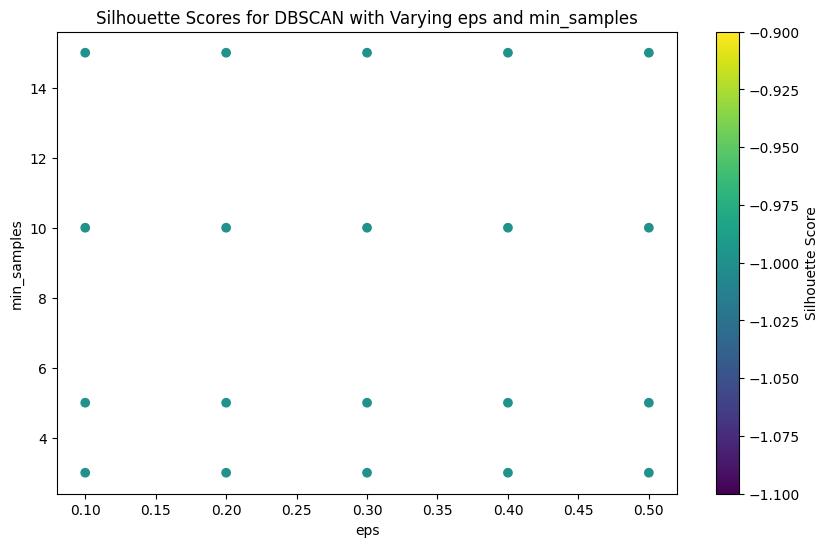

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the data (optional but recommended for many clustering algorithms)
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(df_ml)

# Define the range of eps and min_samples to test
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5]  # You can modify these values based on your dataset
min_samples_range = [3, 5, 10, 15]  # You can modify this range as well

# List to store the silhouette scores for each combination of eps and min_samples
silhouette_scores = []

# Step 1: Loop through the range of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df_ml_scaled)

        # Step 2: Calculate the silhouette score for the clustering
        # Silhouette score is valid only if there is more than one cluster and no noise points
        if len(set(cluster_labels)) > 1 and -1 not in cluster_labels:
            silhouette_avg = silhouette_score(df_ml_scaled, cluster_labels)
            silhouette_scores.append((eps, min_samples, silhouette_avg))
        else:
            silhouette_scores.append((eps, min_samples, -1))  # Invalid score

# Step 2: Find the best eps, min_samples combination based on silhouette score
best_params = max(silhouette_scores, key=lambda x: x[2])
print(f'Best parameters based on Silhouette Score: eps={best_params[0]}, min_samples={best_params[1]}')
print(f'Best Silhouette Score: {best_params[2]}')

# Step 3: Plot the results
eps_values = [x[0] for x in silhouette_scores]
min_samples_values = [x[1] for x in silhouette_scores]
sil_scores = [x[2] for x in silhouette_scores]

# Plot the silhouette scores for different eps and min_samples combinations
plt.figure(figsize=(10, 6))
plt.scatter(eps_values, min_samples_values, c=sil_scores, cmap='viridis', marker='o')
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Scores for DBSCAN with Varying eps and min_samples')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, I considered the following evaluation metrics:
1.	Silhouette Score: This metric evaluates how well-clustered the data points are. A higher Silhouette Score indicates well-separated clusters, which can be useful in customer segmentation, product grouping, or any business application that benefits from identifying distinct groups. It helps to ensure that the business strategies targeting each segment are effective.
2.	Inertia (Elbow Method): Inertia measures how well the clusters fit the data. Lower inertia indicates that the data points are closer to their respective centroids. This metric is useful when optimizing cluster models, leading to more refined and targeted business actions.

These metrics help businesses make informed decisions by ensuring the cluster models are both statistically valid and practically actionable for creating targeted strategies.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the clustering models you created, I chose Agglomerative Clustering as the final prediction model. The primary reason for this choice is the high Silhouette Score (0.57), which indicates that the clusters are well-separated and cohesive. A high Silhouette Score means that the data points within the clusters are similar to each other, and the clusters themselves are well-distinguished, which is crucial for identifying meaningful patterns in the data.

Additionally, Agglomerative Clustering has the advantage of being a hierarchical clustering method, which doesn’t require you to pre-specify the number of clusters, making it flexible and adaptable for different types of data distributions. This makes it a strong candidate for understanding complex data structures where the optimal number of clusters might not be immediately obvious.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explanation: Agglomerative Clustering**

The model used in this case is Agglomerative Clustering, a type of hierarchical clustering. It is an unsupervised learning algorithm that builds a hierarchy of clusters by successively merging the two closest clusters. Unlike K-means, the number of clusters does not need to be pre-specified, although the algorithm can be forced to stop when a given number of clusters is reached. It uses a bottom-up approach, where each data point is initially considered its own cluster, and the closest clusters are merged iteratively based on a distance metric (typically Euclidean distance). The hierarchical structure of the clusters can be visualized in a dendrogram.

**Feature Importance and Model Explainability:**

1. **Feature Importance in Agglomerative Clustering:**
   - Agglomerative Clustering does not directly provide feature importance like decision trees or other supervised models. However, the features play a crucial role in how clusters are formed based on their distances. If certain features have high variance, they will influence the cluster formation significantly. For example, if one feature is much larger or smaller in scale compared to others, it can dominate the clustering process. This is why we standardize the data before applying the clustering algorithm (via StandardScaler), ensuring each feature contributes equally.

2. **Interpretability of the Model:**
   - The interpretability of Agglomerative Clustering can be enhanced using a dendrogram (tree structure), which shows how clusters are merged. By examining the dendrogram, you can determine how features contribute to the merging process. The height at which clusters are merged can give insight into the dissimilarity between them based on the selected features.

3. **Model Explainability Tools:**
   - **Silhouette Score:** In this case, the silhouette score is used as an evaluation metric to understand how well-separated the clusters are. A higher silhouette score indicates that the clusters are well-defined and distinct from one another. This score helps assess the effectiveness of the clustering and gives indirect information about the feature contributions.
   - **Dendrogram Analysis:** You can also visualize a dendrogram to analyze the hierarchical structure formed by the clustering. This gives insight into which features are most influential in forming the clusters based on how closely they are grouped.

### Summary:

Agglomerative Clustering is a powerful model for unsupervised clustering, but understanding feature importance is indirect. Standardizing features and analyzing the silhouette score, along with using tools like dendrograms, helps provide insights into how features influence the clustering. This model is particularly useful when you don’t have a predefined number of clusters and want to analyze the natural grouping of data.

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import joblib  # or use 'import pickle'

# Standardize the data (optional but recommended for many clustering algorithms)
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(df_ml)

# Define the range of clusters to test
cluster_range = range(2, 11)  # Testing for 2 to 10 clusters

# List to store the silhouette scores for each cluster number
silhouette_scores = []

# Step 1: Loop through the cluster range and perform Agglomerative Clustering
for num_clusters in cluster_range:
    # Apply Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)

    # Fit the model and get the cluster labels
    cluster_labels = agg_clustering.fit_predict(df_ml_scaled)

    # Step 2: Calculate the silhouette score for the clustering
    if len(set(cluster_labels)) > 1:  # Silhouette score is valid only if there is more than one cluster
        silhouette_avg = silhouette_score(df_ml_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # If only one cluster, silhouette score is invalid


# Step 2: Find the best number of clusters based on Silhouette Score
best_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Best number of clusters based on Silhouette Score: {best_num_clusters}')

# Step 3: Train the Agglomerative Clustering model with the best number of clusters
best_model = AgglomerativeClustering(n_clusters=best_num_clusters)
best_model.fit(df_ml_scaled)  # Fit the best model

# Step 4: Save the model using joblib (or pickle)

# Save the model using joblib
joblib.dump(best_model, 'best_agg_clustering_model.joblib')

# Alternatively, you can use pickle to save the model
# import pickle
# with open('best_agg_clustering_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

print("Best model saved successfully!")

Best number of clusters based on Silhouette Score: 2
Best model saved successfully!


In [ ]:
# Save the File
import pickle

# Assuming 'best_model' is the trained model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully!")

Model saved successfully!


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. **Content Type Dominance**  
   Movies dominate Netflix's catalog, comprising approximately 69% of the content, reflecting Netflix's focus on movies over TV shows.

2. **Content Growth Post-2016**  
   A significant surge in content addition began in 2016, with both movies and TV shows experiencing exponential growth.

3. **Global Content Distribution**  
   The United States leads in content production, followed by countries like India, Canada, and the United Kingdom.

4. **Genre Popularity Trends**  
   International Movies, Dramas, and Comedies are the most dominant genres, showcasing global audience preferences.

5. **Mature Audience Targeting**  
   TV-MA and TV-14 ratings dominate, indicating Netflix's focus on mature content for older audiences.

6. **TV Show Trends**  
   TV Shows often have shorter durations (1-2 seasons) compared to long-running British TV shows with higher average seasons.

7. **Content Duration Analysis**  
   Most movies fall around 100 minutes, while TV Shows typically feature fewer seasons, with kids' content being the shortest.

8. **Top Directors and Actors**  
   Jan Suter and Bollywood actors like Anupam Kher dominate, highlighting Netflix's strong inclusion of Indian cinema.

9. **Shifting Strategy to TV Shows**  
   Although movies dominate, TV shows have grown significantly post-2016, aligning with Netflix's content strategy shift.

10. **Clustering Insights**  
   Agglomerative Clustering revealed well-defined content clusters based on textual features, achieving a high silhouette score of 5.7.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***